In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Reading the segmented DataFrame
df = pd.read_pickle('../data/processed/k_means_pca.pkl')
df.head(5)

,Age Range,Gender,Occupation,Household Size,Consideration of Household Needs,Rating of Internet Service Features,Entertainment,Searching Information,Communication or Messaging,News,...,Social Media Coms,Television,Radio,"Billboards, Posters or Stickers outdoors",Newspapers or magazines,Price Matches,Best,Best2,Least,k_means_pca
0,0,1,19,2,1,18,0,1,0,0,...,1,0,0,0,0,1,2,4,2,0
1,1,1,3,4,1,7,1,1,1,0,...,0,0,0,0,0,0,0,4,2,1
2,0,1,19,5,1,10,1,0,0,0,...,0,0,0,0,0,0,2,0,2,0
3,0,1,21,4,0,1,1,1,1,1,...,1,0,0,1,0,1,0,2,3,1
4,0,1,9,4,0,25,1,1,1,1,...,1,0,0,0,0,0,3,3,2,2


In [3]:
from customer_segmentation.utils.encoding import decode_categorical_features

# Restore the 'label_encoders' variable from the clean_raw.ipynb session
%store -r label_encoders

# Decode the categorical features in 'df_encoded' using the 'label_encoders'
df = decode_categorical_features(df, label_encoders)

In [4]:
color = {
    0: '#ff6602ff',
    1: '#0f7175ff',
    2: '#c65dc9ff',
}

In [5]:
segment_1= df[df["k_means_pca"] == 0]
segment_2= df[df["k_means_pca"] == 1]
segment_3= df[df["k_means_pca"] == 2]


segments=[segment_1,segment_2,segment_3]


In [6]:
def plot_question(question,segmentos,titulo,rotation = False):
    fig.suptitle(str(titulo), fontsize=16)
    for n, i in enumerate(question):
        for j, df in enumerate(segmentos):

            g = sns.histplot(stat="percent", multiple="dodge", shrink=1, ax=axes[j], x=df[i], palette=color,
                            hue=df["k_means_pca"])

            # Agregar los valores encima de los bins
            for p in g.patches:
                height = p.get_height()
                if height > 0:
                    axes[j].annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

            if rotation:
                plt.setp(axes[j].get_xticklabels(), rotation=90, ha='center')
            
            g.set(xlabel=None)
            g.set(ylabel=None)

# Demographic Analysis

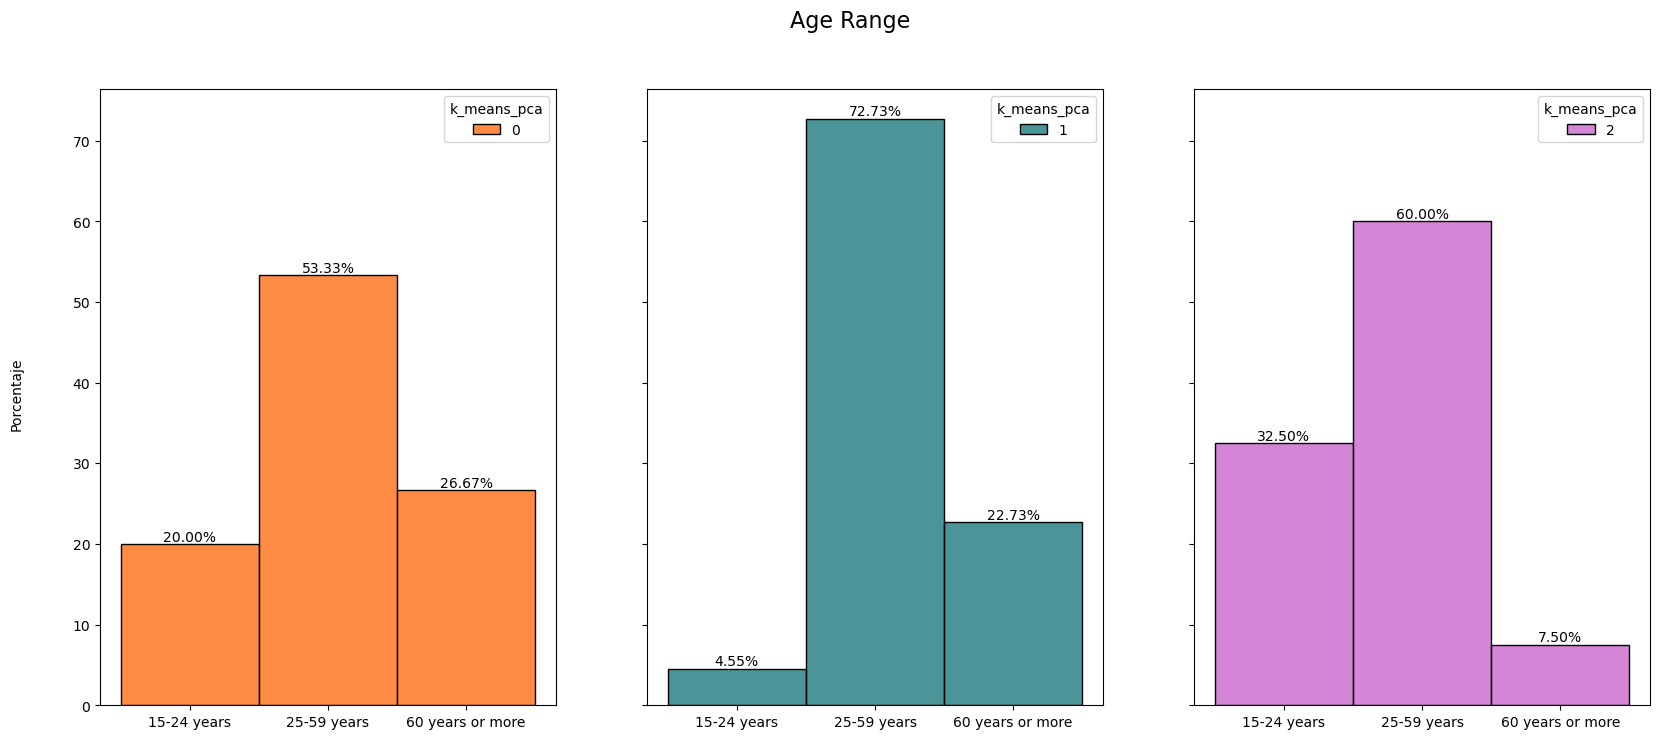

In [7]:
question = ['Age Range']
fig, axes = plt.subplots(len(question), 3, figsize=(20, 8), sharey='row',sharex='all')
fig.text(0.08,0.5,s='Porcentaje',va='center', rotation='vertical')


plot_question(question,segments,question[0])

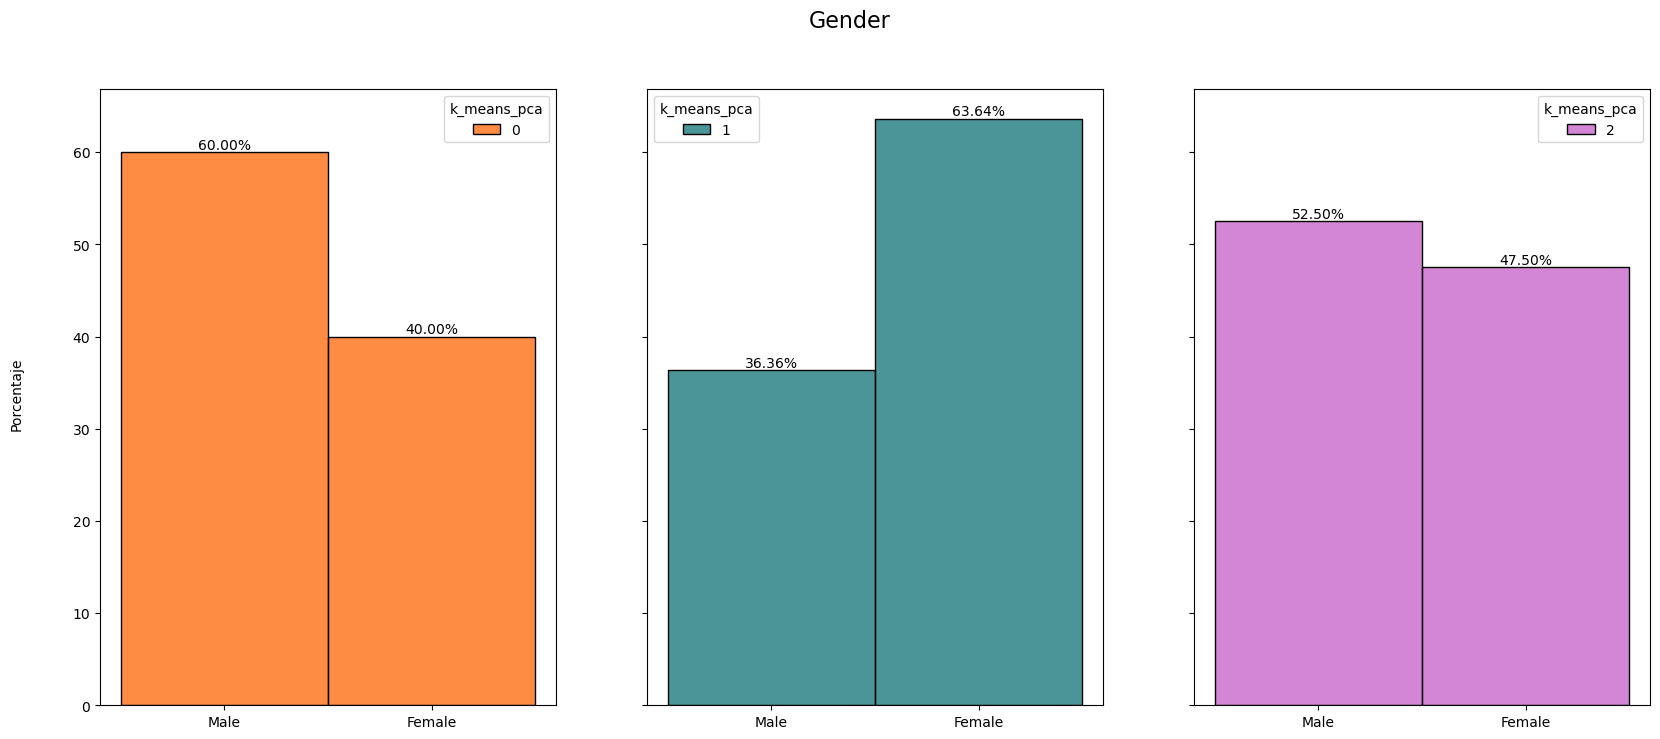

In [8]:
question = ['Gender']
fig, axes = plt.subplots(len(question), 3, figsize=(20, 8), sharey='row',sharex='all')
fig.text(0.08,0.5,s='Porcentaje',va='center', rotation='vertical')


plot_question(question,segments,question[0])

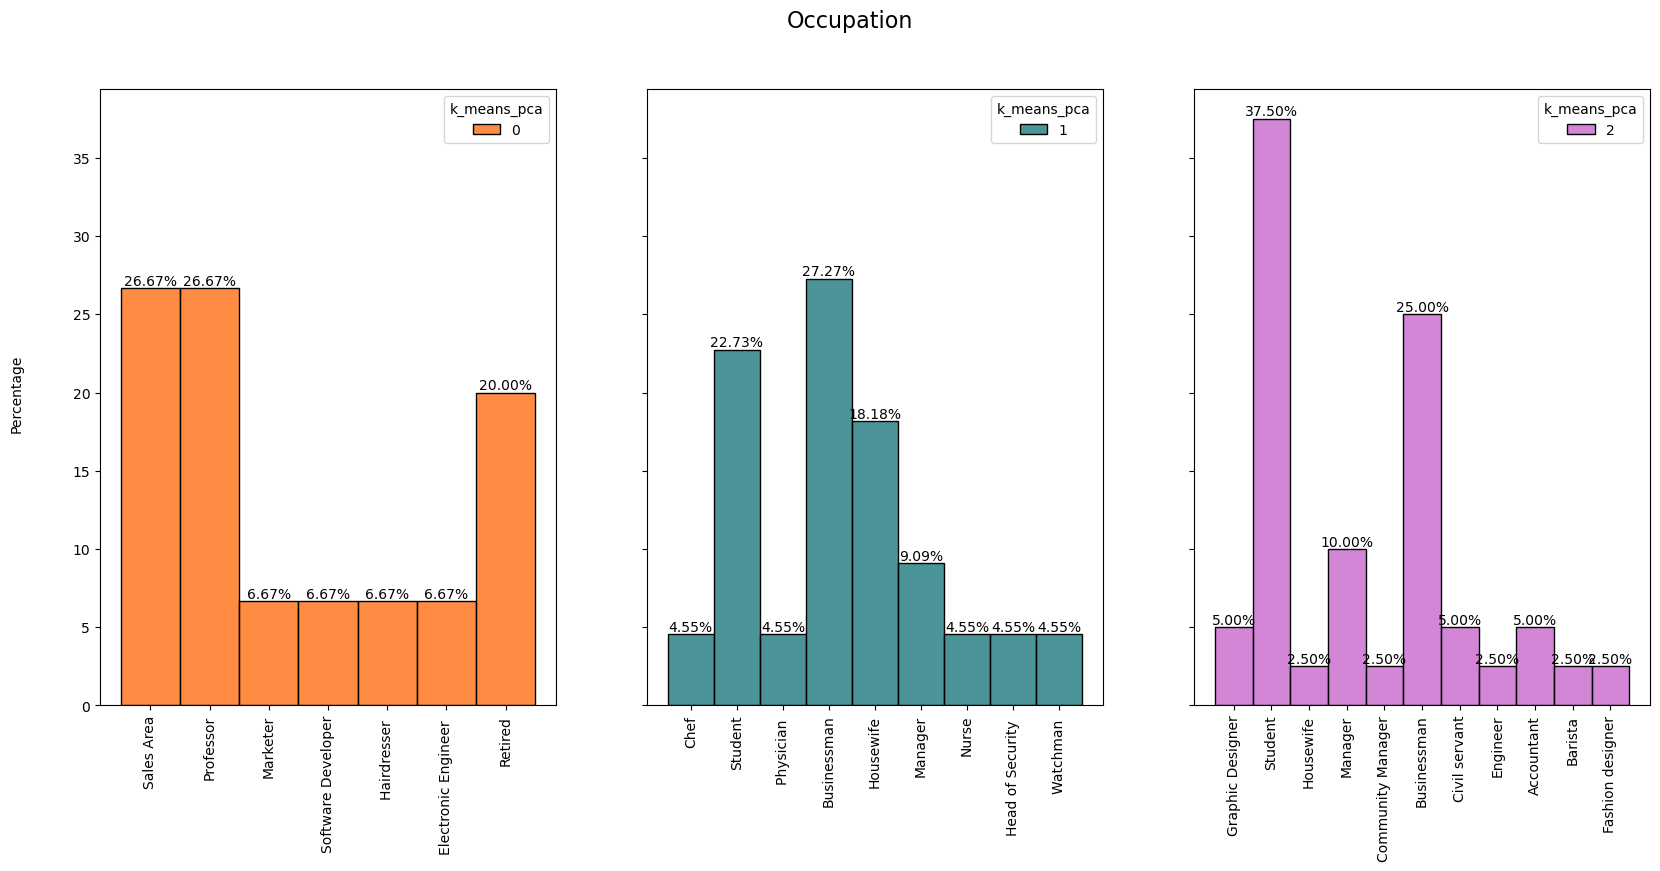

In [45]:
question = ['Occupation']
fig, axes = plt.subplots(len(question), 3, figsize=(20, 8), sharey='row')
fig.text(0.08,0.5,s='Percentage',va='center', rotation='vertical')


plot_question(question,segments,question[0],rotation=True)

/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer 

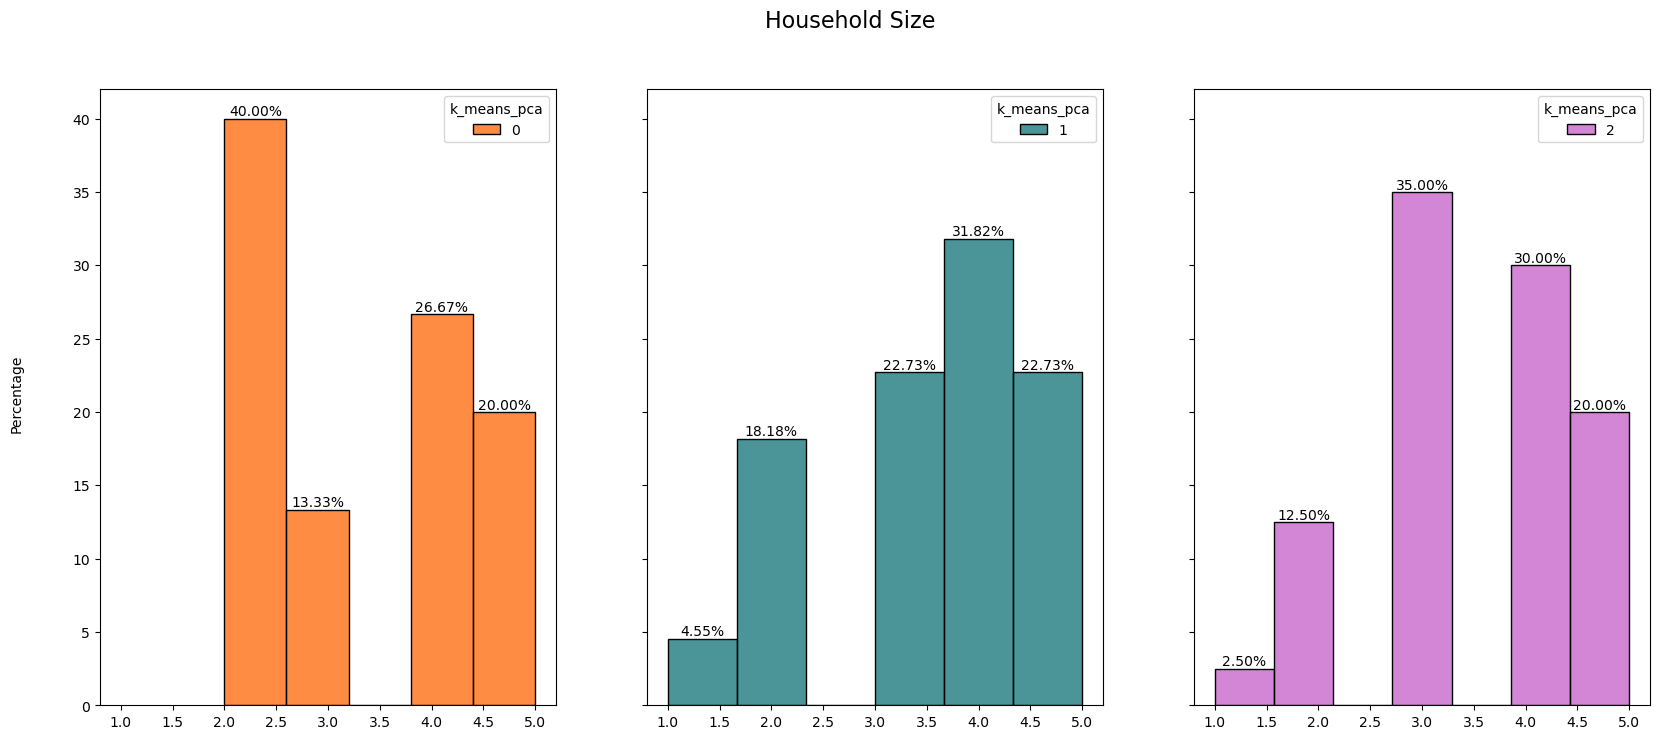

In [47]:
question = ['Household Size']
fig, axes = plt.subplots(len(question), 3, figsize=(20, 8), sharey='row',sharex='all')
fig.text(0.08,0.5,s='Percentage',va='center', rotation='vertical')


plot_question(question,segments,question[0])

/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer 

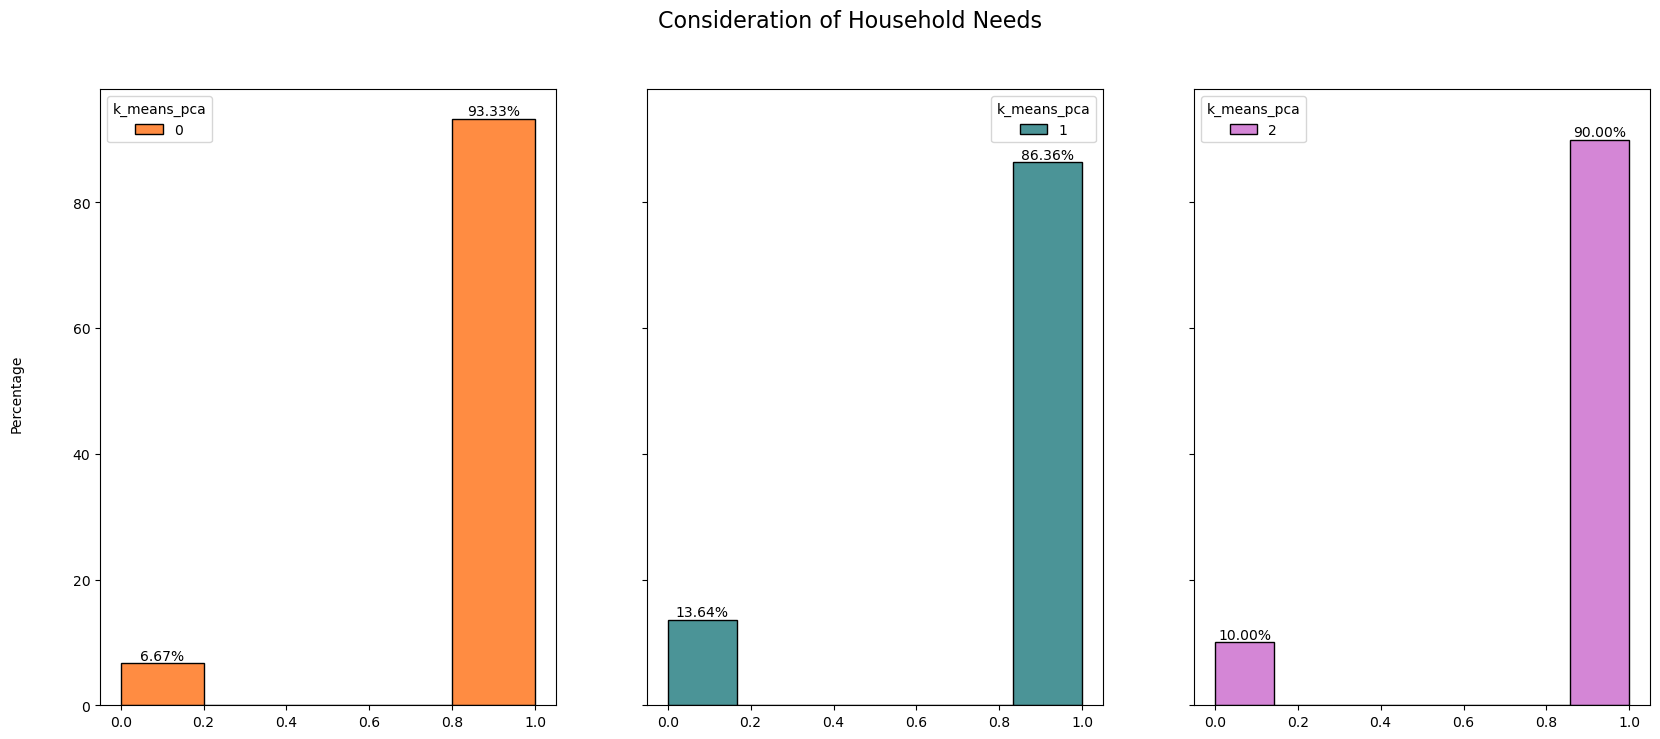

In [12]:
question = ['Consideration of Household Needs']
fig, axes = plt.subplots(len(question), 3, figsize=(20, 8), sharey='row',sharex='all')
fig.text(0.08,0.5,s='Percentage',va='center', rotation='vertical')


plot_question(question,segments,question[0])

# Socioeconomic Analysis

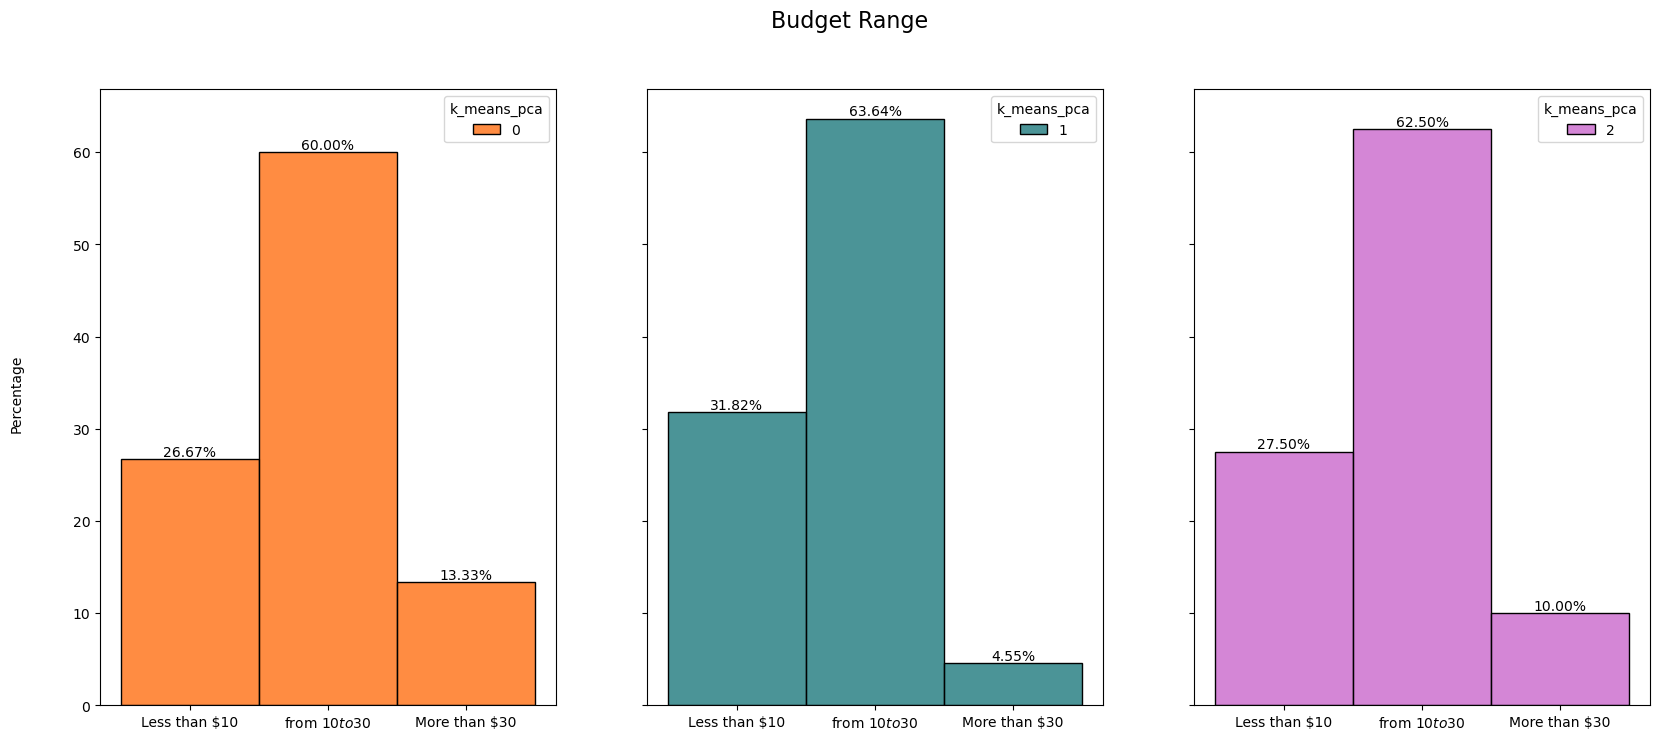

In [42]:
question = ['Budget Range']
fig, axes = plt.subplots(len(question), 3, figsize=(20, 8), sharey='row',sharex='all')
fig.text(0.08,0.5,s='Percentage',va='center', rotation='vertical')

plot_question(question,segments,question[0])

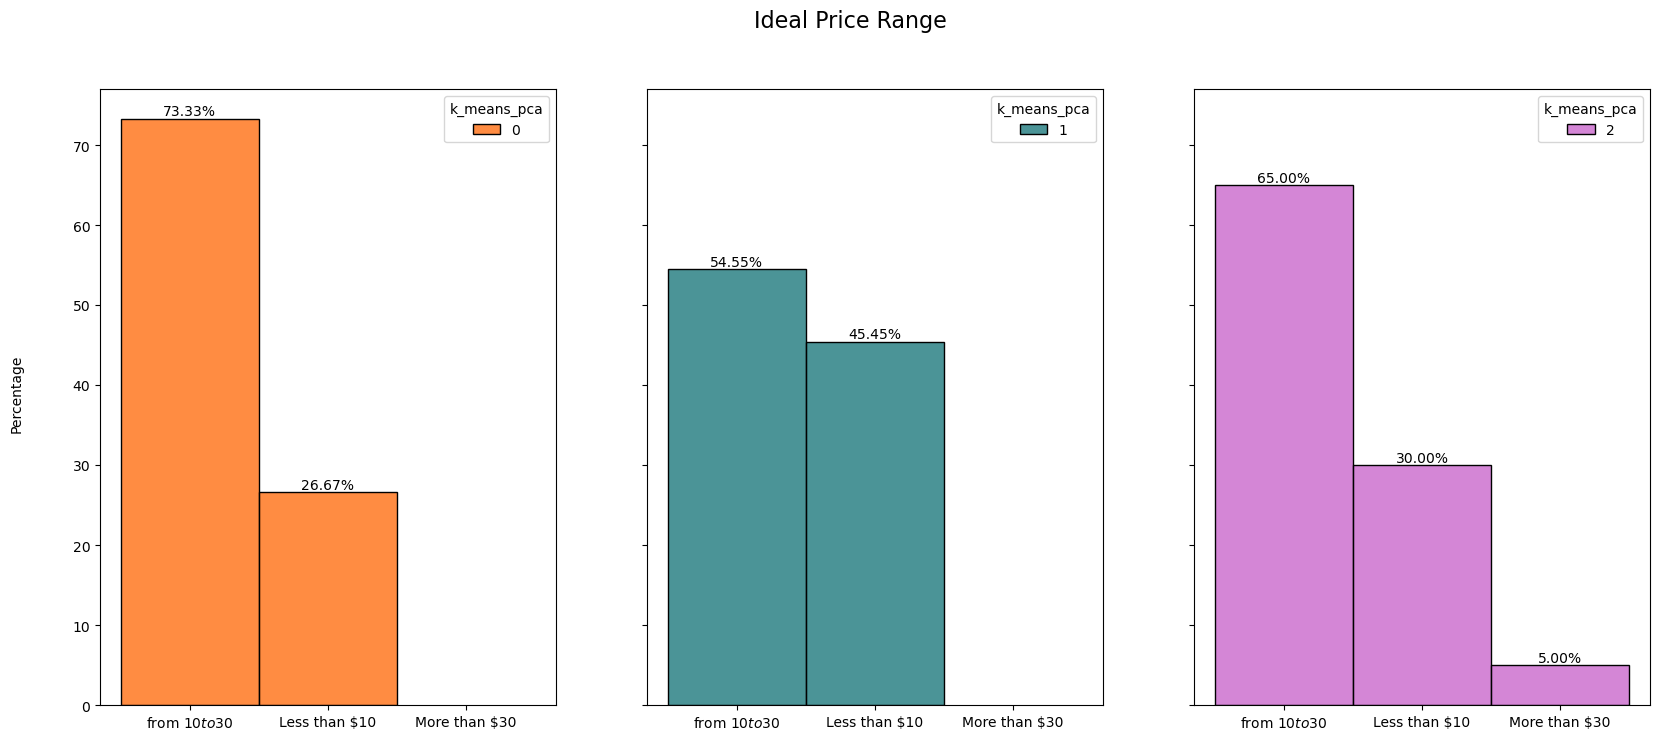

In [43]:
question = ['Ideal Price Range']
fig, axes = plt.subplots(len(question), 3, figsize=(20, 8), sharey='row',sharex='all')
fig.text(0.08,0.5,s='Percentage',va='center', rotation='vertical')


plot_question(question,segments,question[0])

In [ ]:
question = ['Price Matches']
fig, axes = plt.subplots(len(question), 3, figsize=(20, 8), sharey='row',sharex='all')
fig.text(0.08,0.5,s='Percentage',va='center', rotation='vertical')


plot_question(question,segments,question[0])

# Consumption Habits Identification

In [ ]:
question = ['Best']
fig, axes = plt.subplots(len(question), 3, figsize=(20, 8), sharey='row',sharex='all')
fig.text(0.08,0.5,s='Percentage',va='center', rotation='vertical')


plot_question(question,segments,question[0],rotation=True)

In [ ]:
question = ['Best2']
fig, axes = plt.subplots(len(question), 3, figsize=(20, 8), sharey='row',sharex='all')
fig.text(0.08,0.5,s='Percentage',va='center', rotation='vertical')


plot_question(question,segments,question[0],rotation=True)

In [ ]:
question = ['Least']
fig, axes = plt.subplots(len(question), 3, figsize=(20, 8), sharey='row',sharex='all')
fig.text(0.08,0.5,s='Percentage',va='center', rotation='vertical')


plot_question(question,segments,question[0],rotation=True)

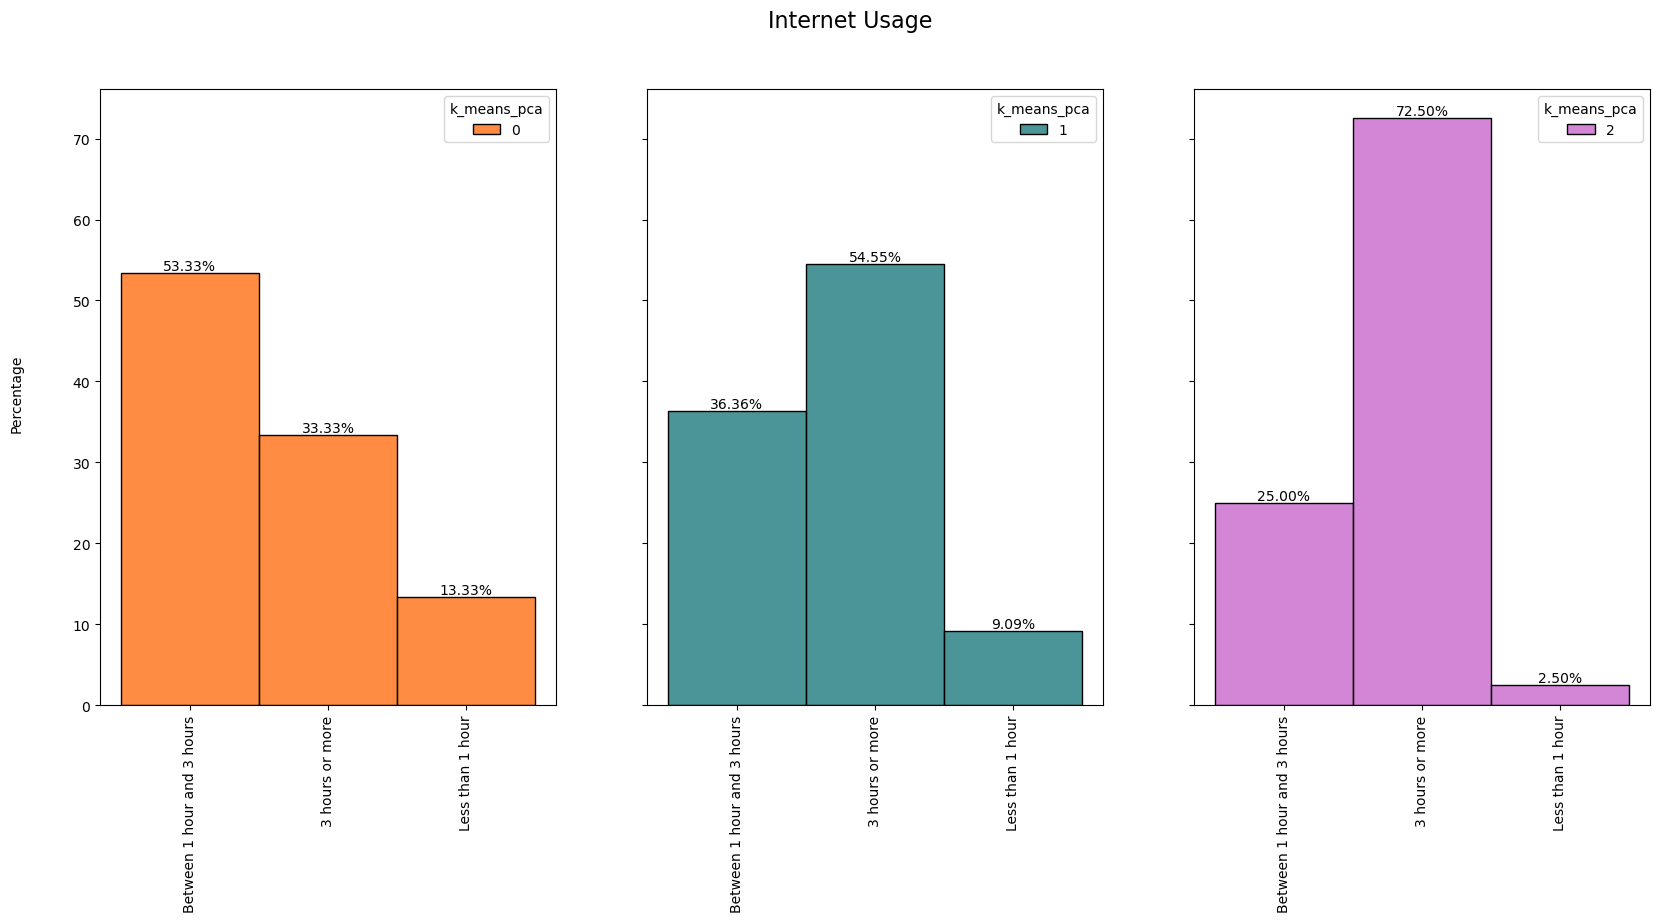

In [44]:
question = ['Internet Usage']
fig, axes = plt.subplots(len(question), 3, figsize=(20, 8), sharey='row',sharex='all')
fig.text(0.08,0.5,s='Percentage',va='center', rotation='vertical')


plot_question(question,segments,question[0],rotation=True)

/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer 

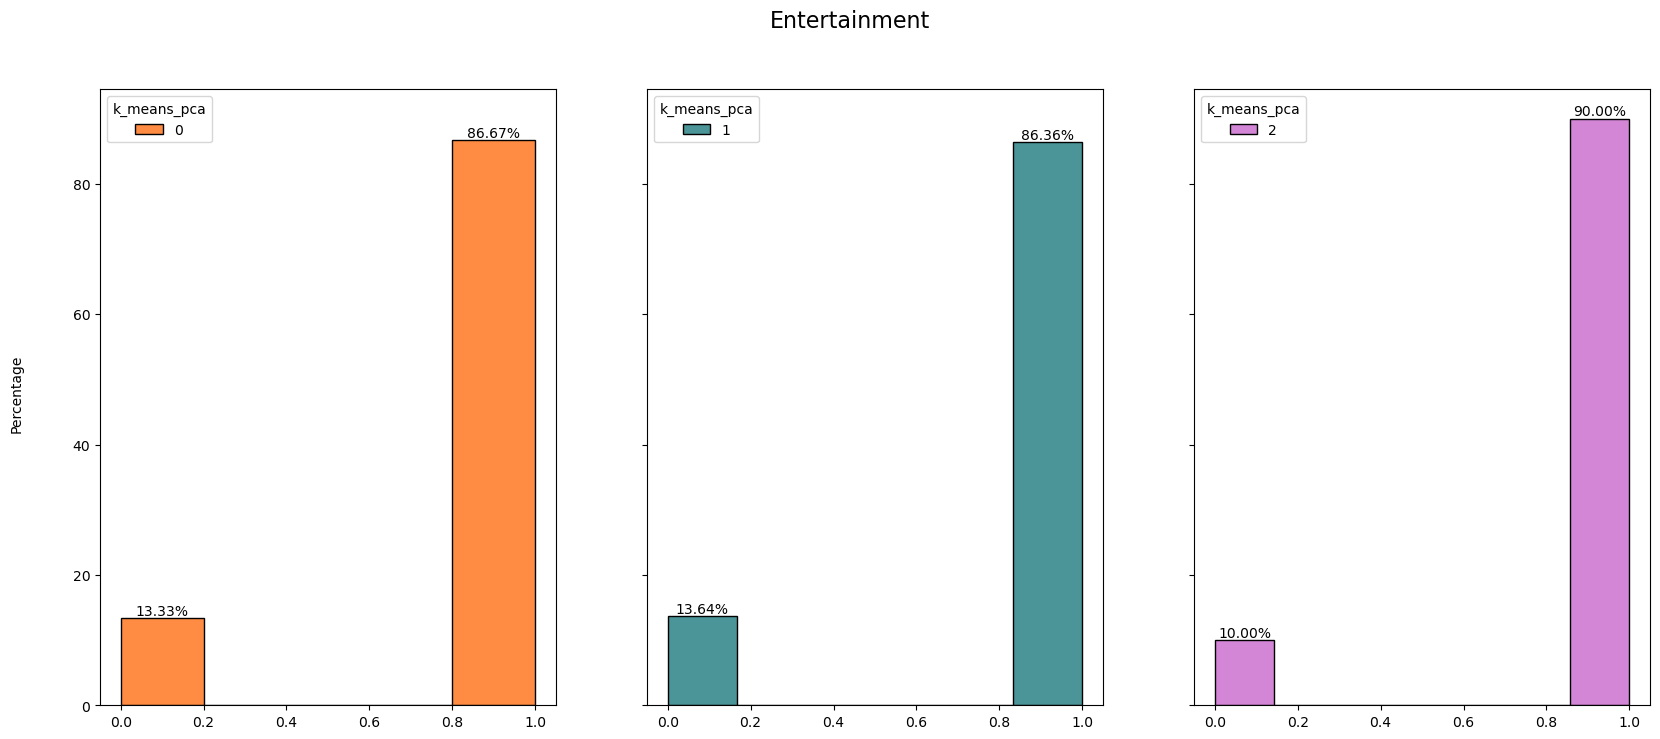

In [13]:
question = ['Entertainment']
fig, axes = plt.subplots(len(question), 3, figsize=(20, 8), sharey='row',sharex='all')
fig.text(0.08,0.5,s='Percentage',va='center', rotation='vertical')


plot_question(question,segments,question[0])

/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer 

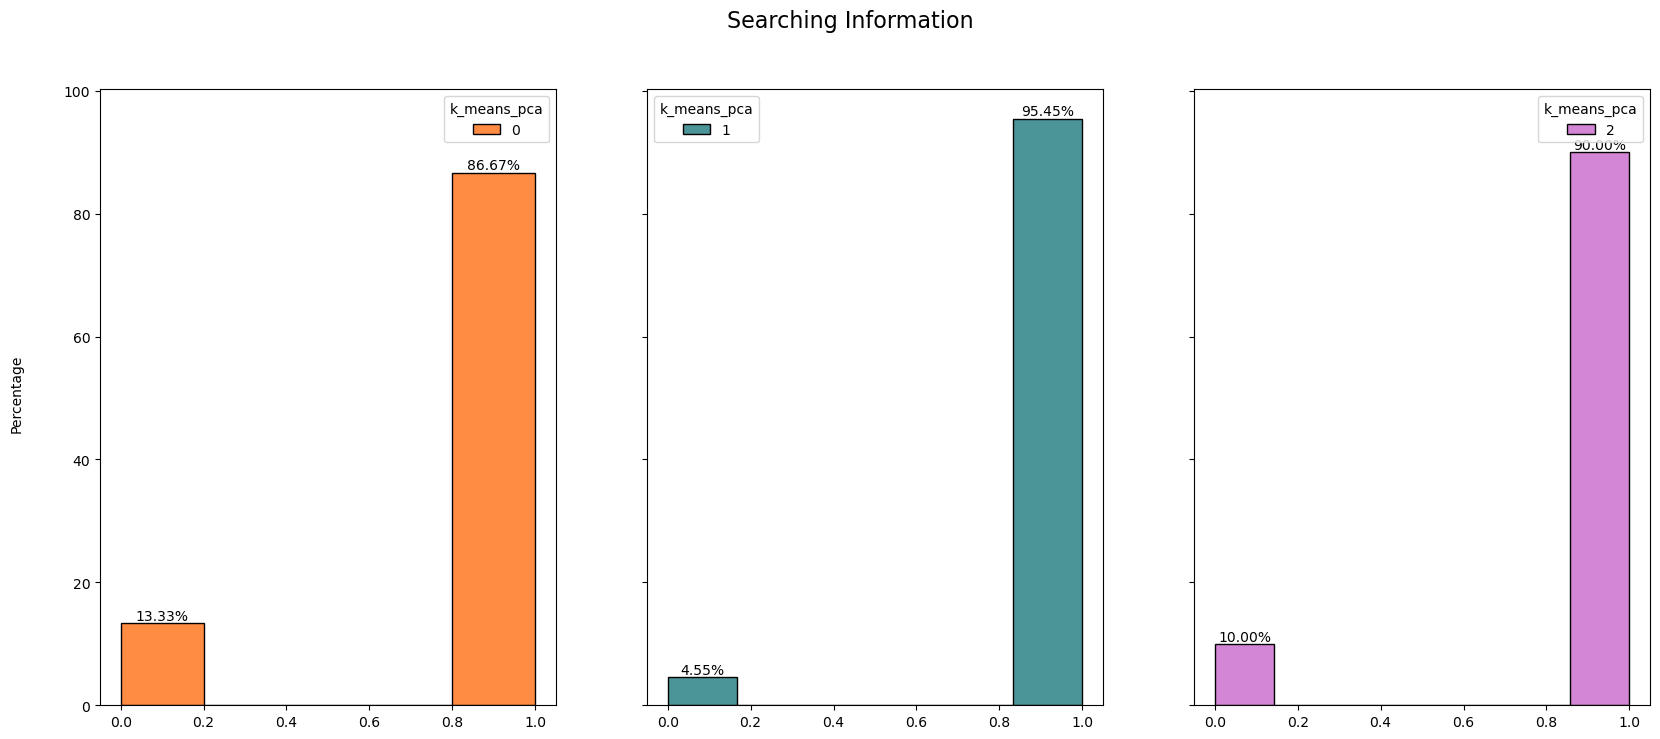

In [14]:
question = ['Searching Information']
fig, axes = plt.subplots(len(question), 3, figsize=(20, 8), sharey='row',sharex='all')
fig.text(0.08,0.5,s='Percentage',va='center', rotation='vertical')


plot_question(question,segments,question[0])

/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer 

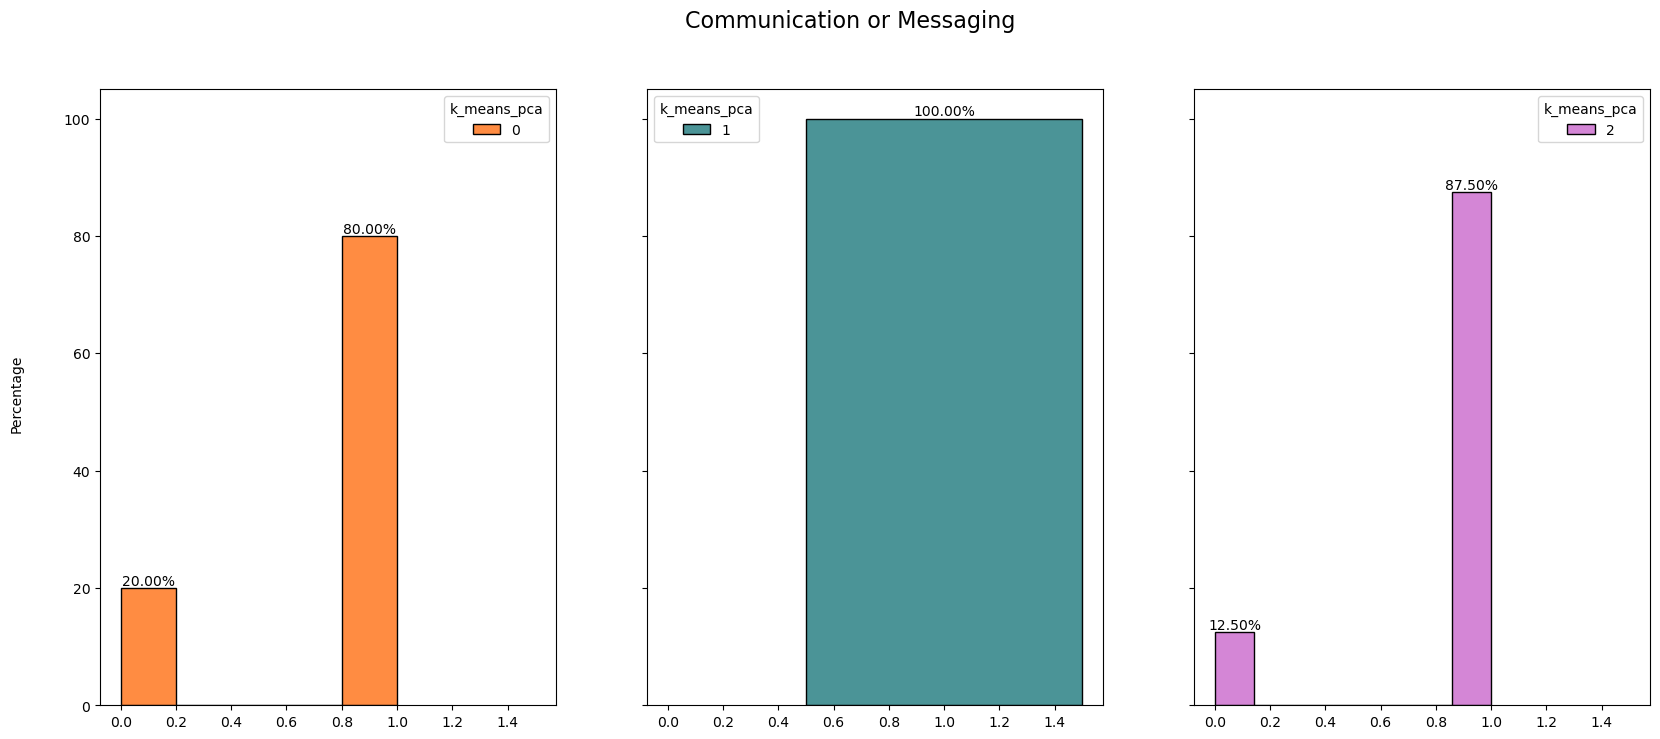

In [15]:
question = ['Communication or Messaging']
fig, axes = plt.subplots(len(question), 3, figsize=(20, 8), sharey='row',sharex='all')
fig.text(0.08,0.5,s='Percentage',va='center', rotation='vertical')


plot_question(question,segments,question[0])

/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer 

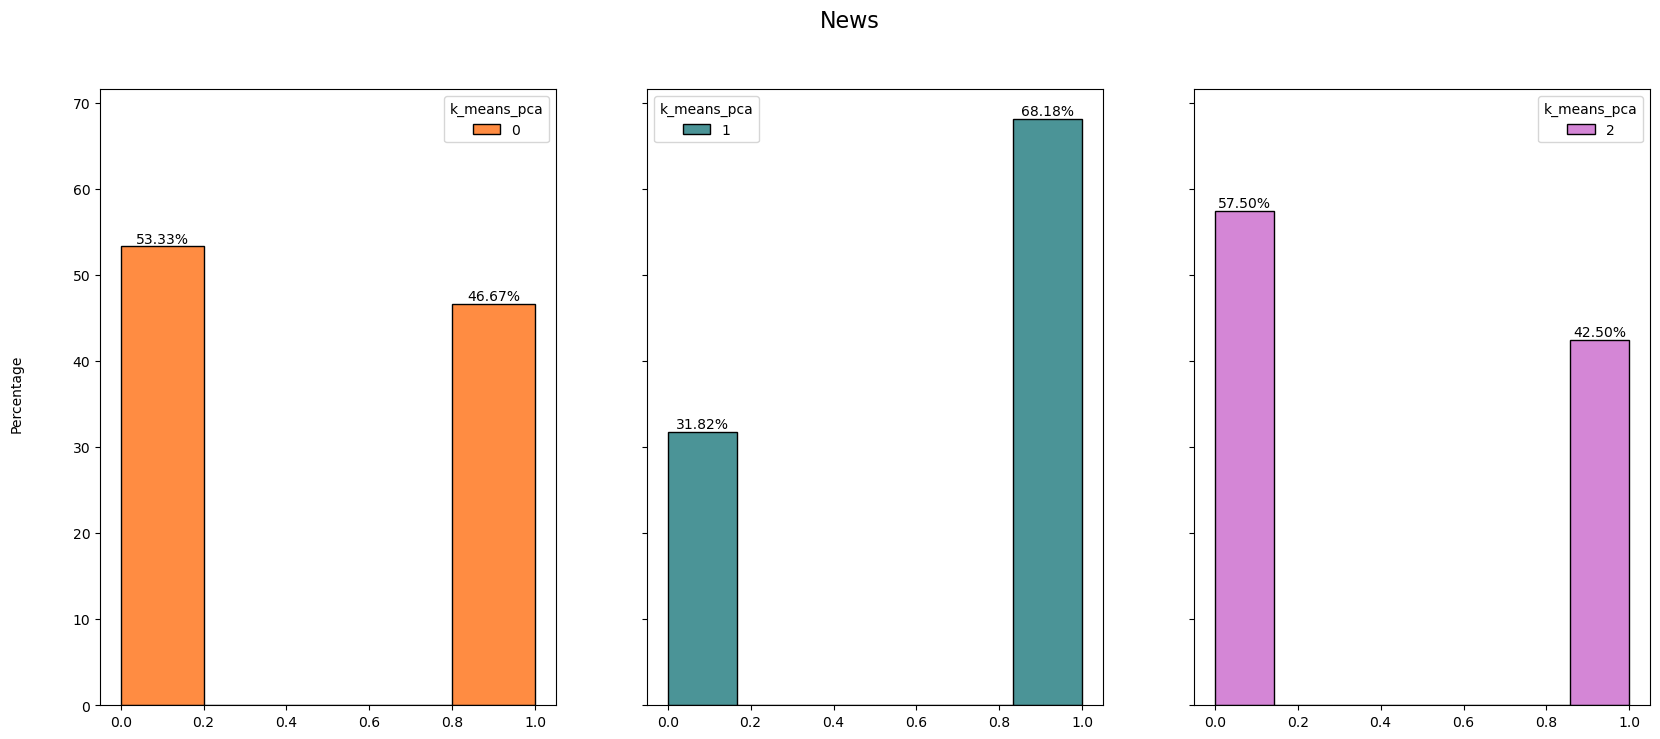

In [16]:
question = ['News']
fig, axes = plt.subplots(len(question), 3, figsize=(20, 8), sharey='row',sharex='all')
fig.text(0.08,0.5,s='Percentage',va='center', rotation='vertical')


plot_question(question,segments,question[0])

/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer 

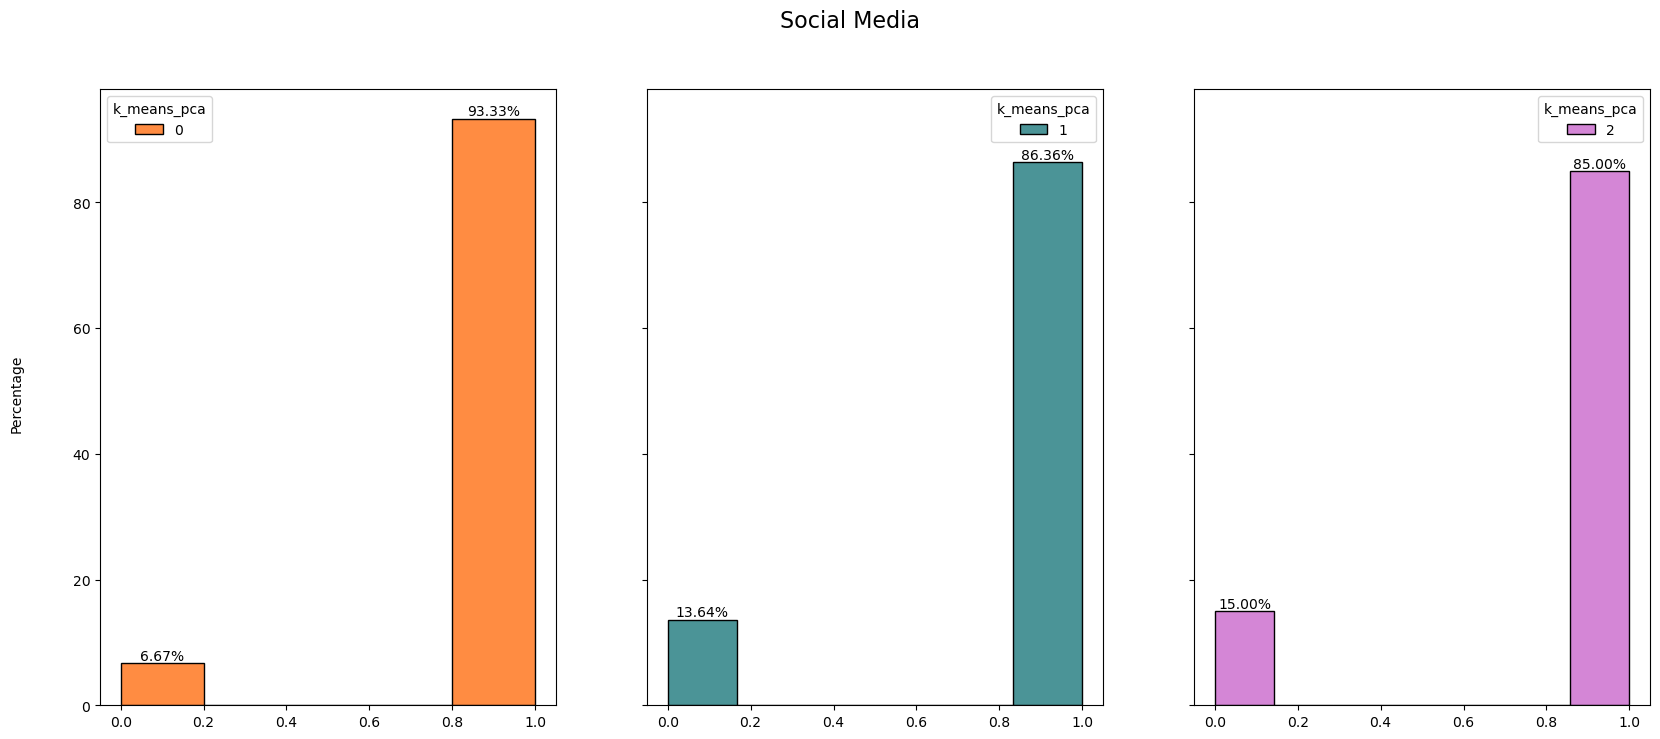

In [17]:
question = ['Social Media']
fig, axes = plt.subplots(len(question), 3, figsize=(20, 8), sharey='row',sharex='all')
fig.text(0.08,0.5,s='Percentage',va='center', rotation='vertical')


plot_question(question,segments,question[0])

/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer 

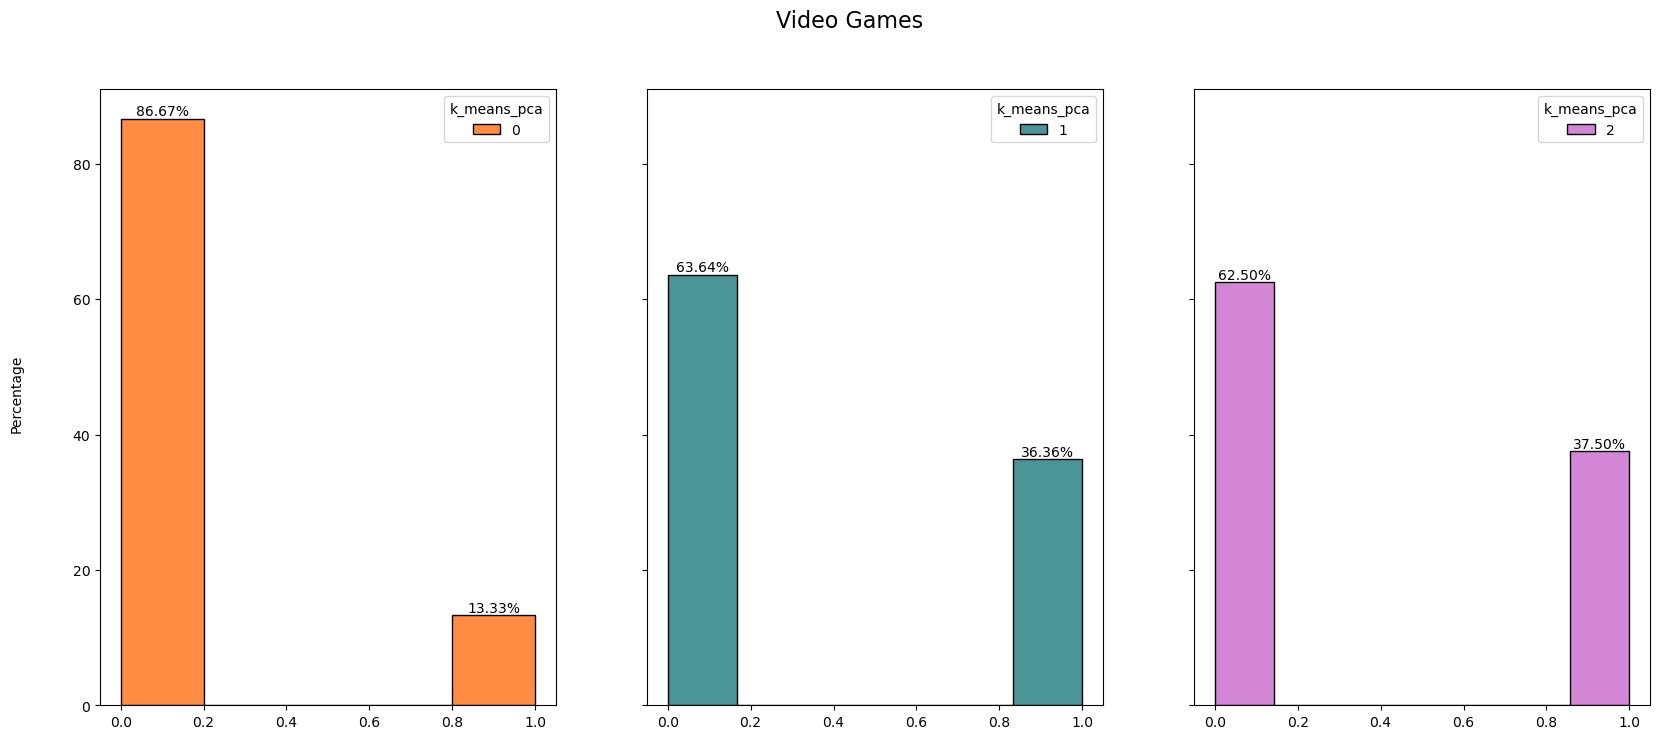

In [18]:
question = ['Video Games']
fig, axes = plt.subplots(len(question), 3, figsize=(20, 8), sharey='row',sharex='all')
fig.text(0.08,0.5,s='Percentage',va='center', rotation='vertical')


plot_question(question,segments,question[0])

/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer 

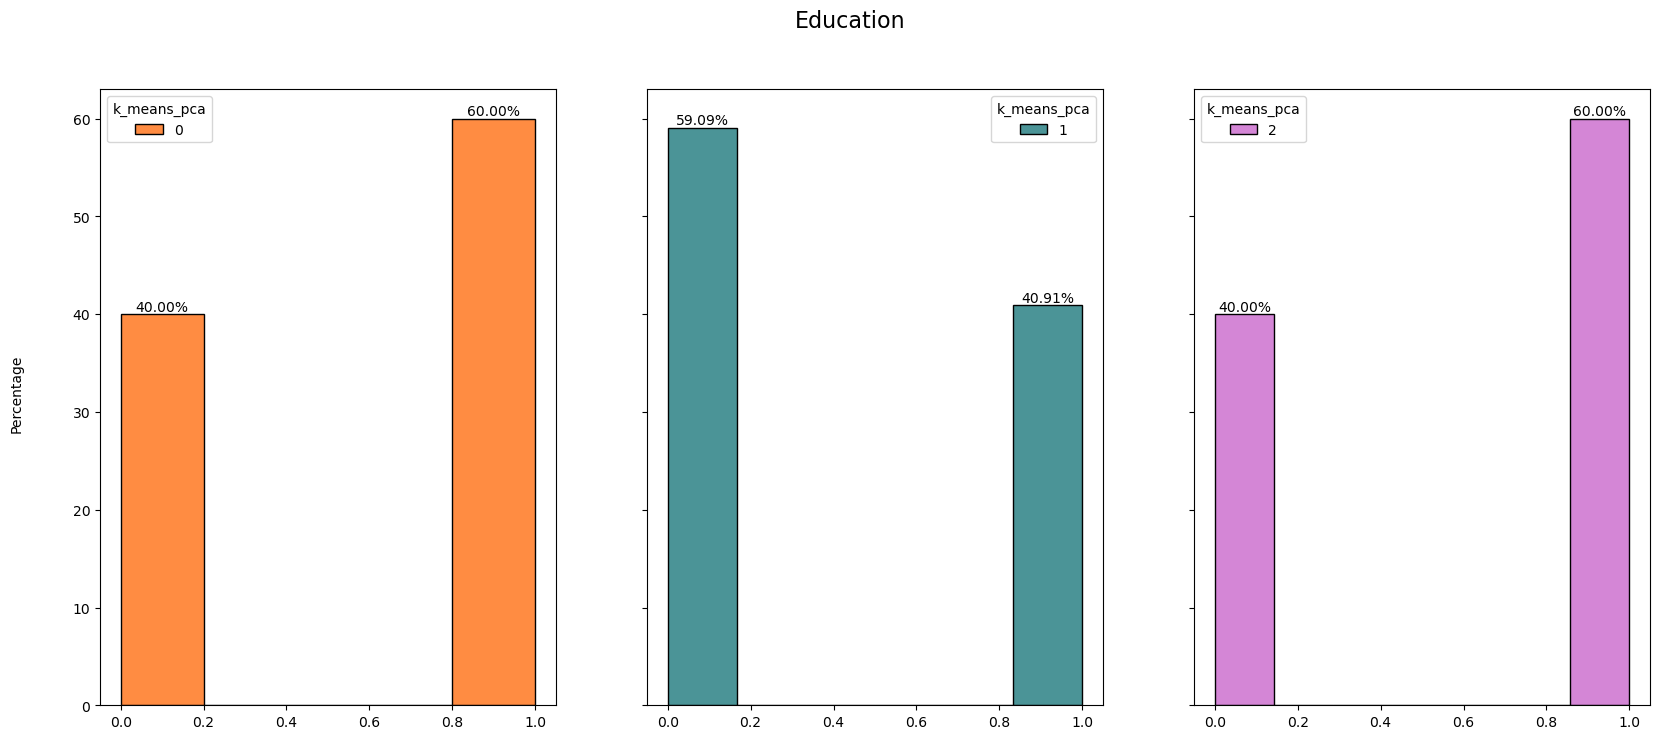

In [19]:
question = ['Education']
fig, axes = plt.subplots(len(question), 3, figsize=(20, 8), sharey='row',sharex='all')
fig.text(0.08,0.5,s='Percentage',va='center', rotation='vertical')


plot_question(question,segments,question[0])

/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer 

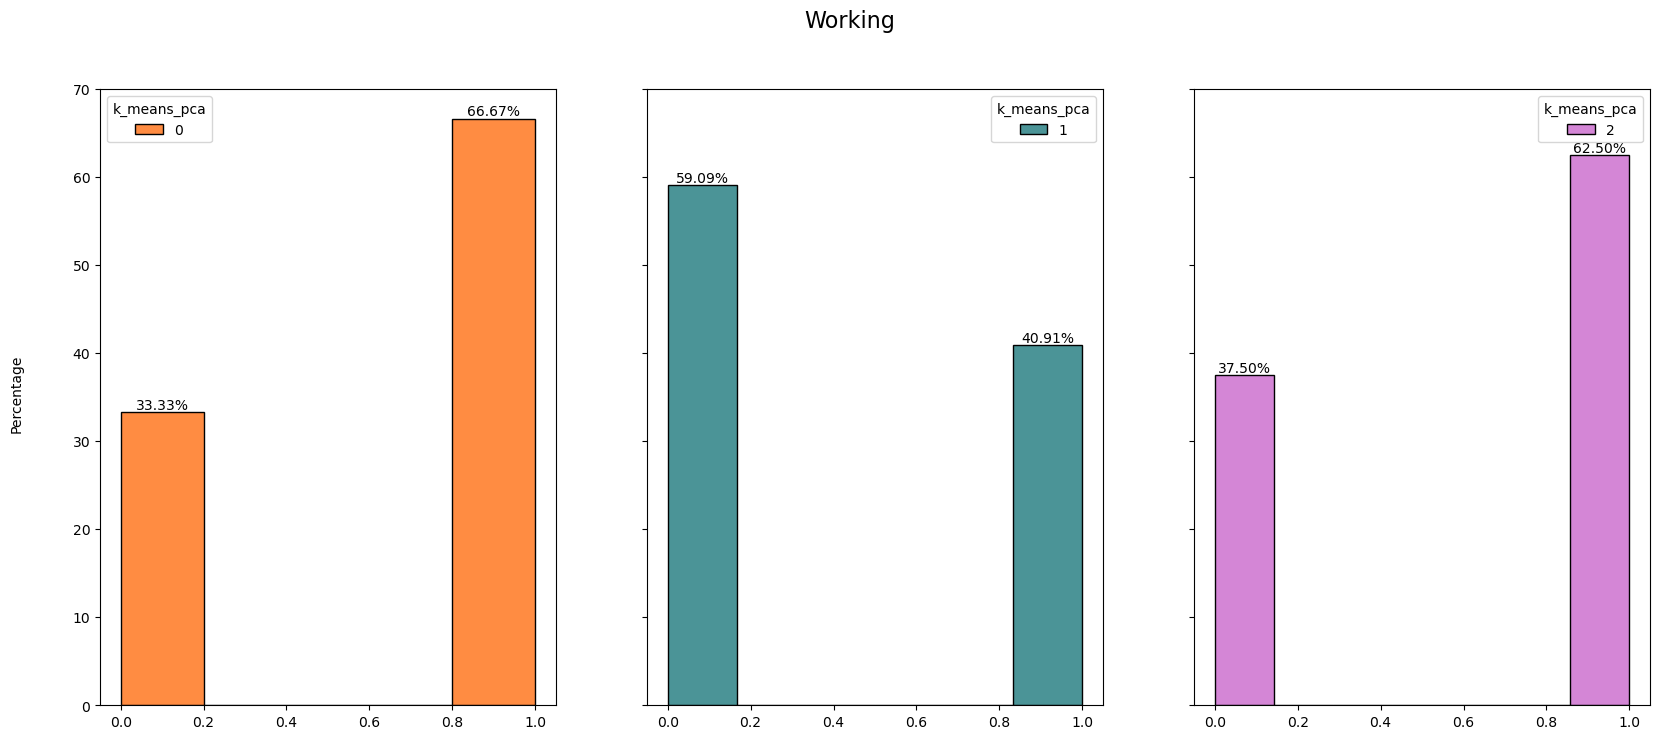

In [20]:
question = ['Working']
fig, axes = plt.subplots(len(question), 3, figsize=(20, 8), sharey='row',sharex='all')
fig.text(0.08,0.5,s='Percentage',va='center', rotation='vertical')


plot_question(question,segments,question[0])

/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer 

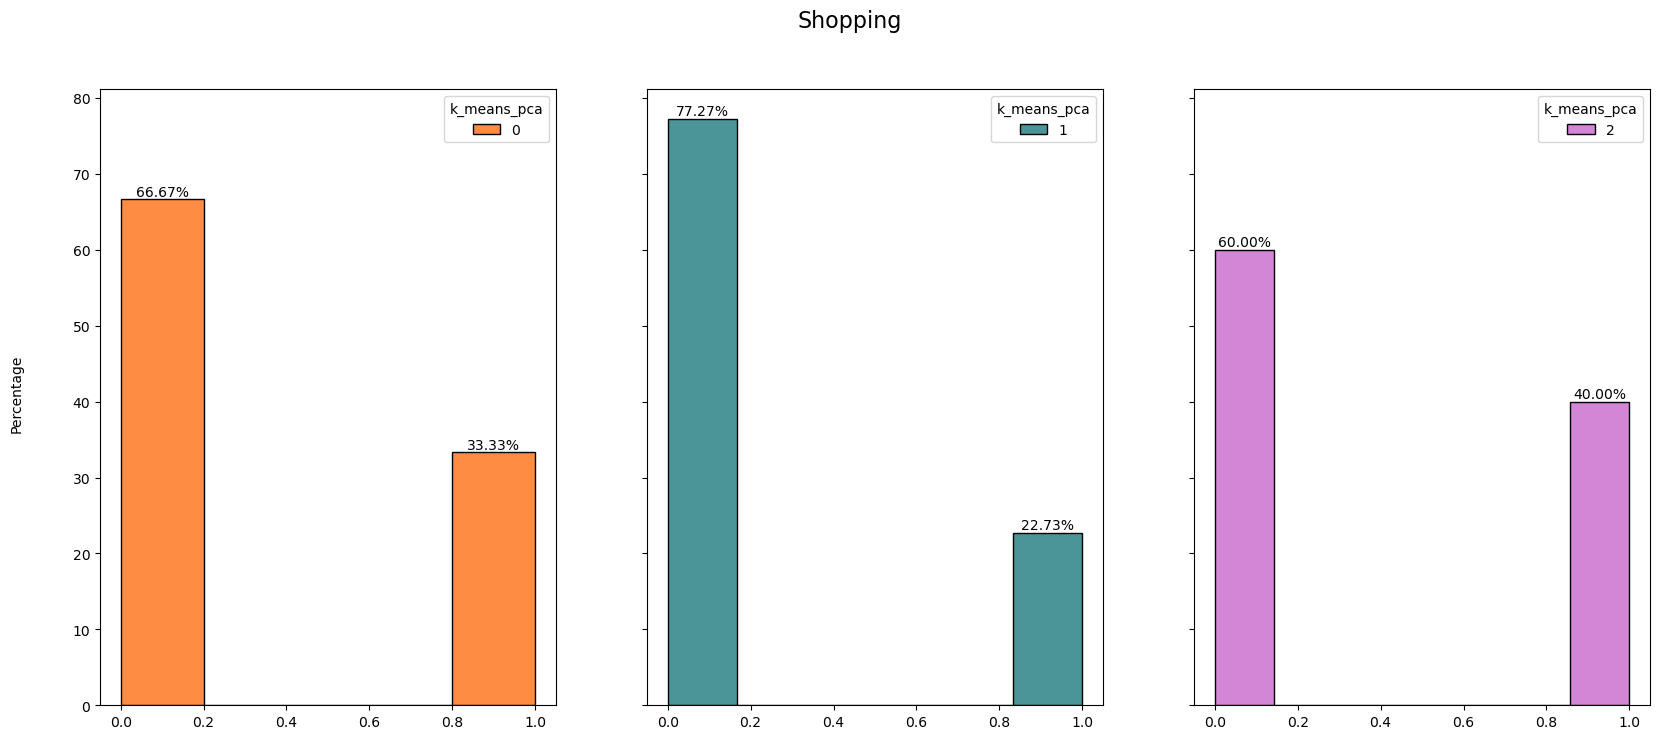

In [21]:
question = ['Shopping']
fig, axes = plt.subplots(len(question), 3, figsize=(20, 8), sharey='row',sharex='all')
fig.text(0.08,0.5,s='Percentage',va='center', rotation='vertical')


plot_question(question,segments,question[0])

# Positioning and Loyalty Analysis:

/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer 

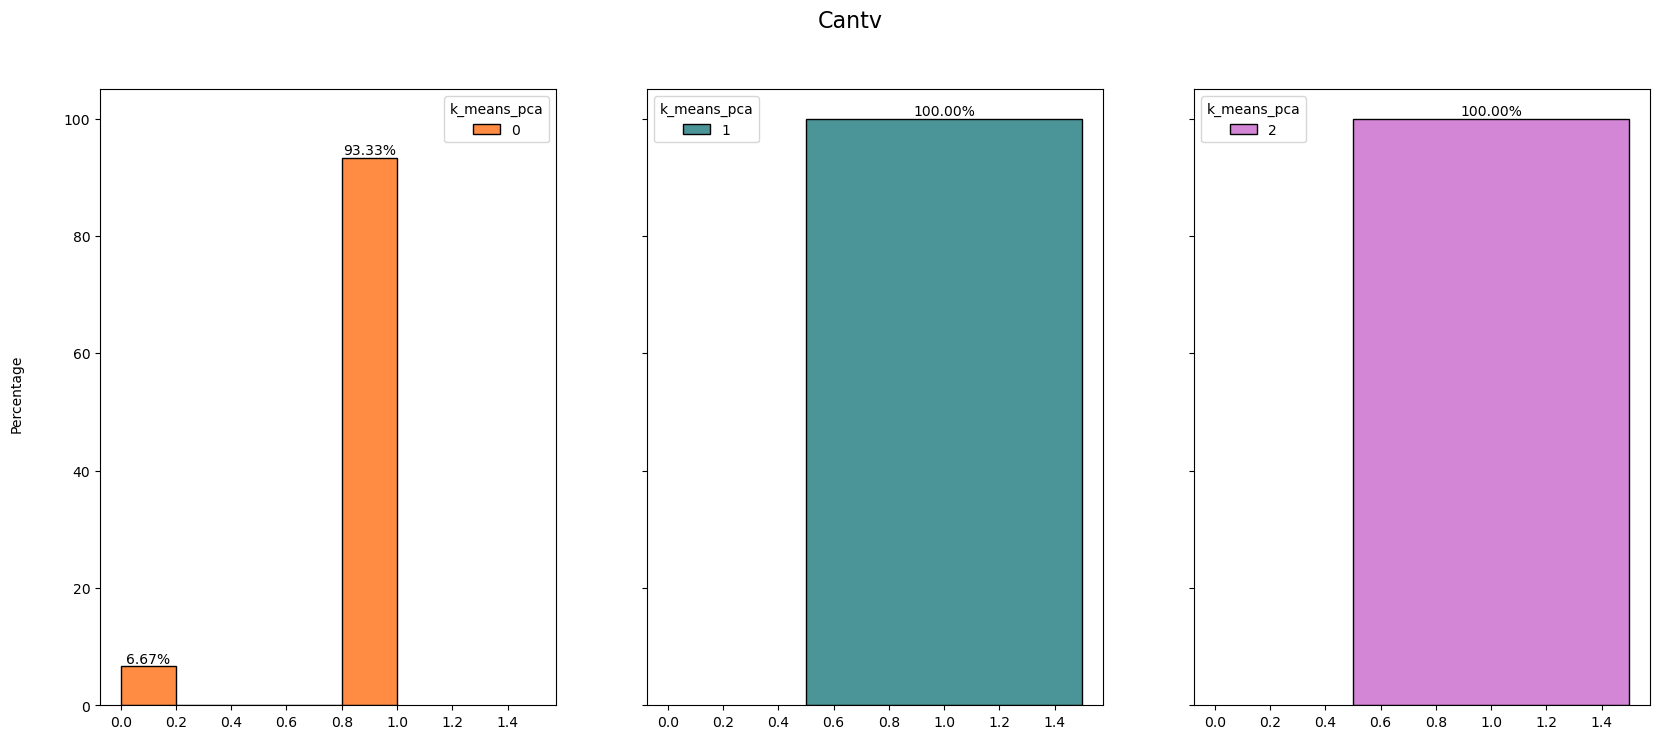

In [51]:
question = ['Cantv']
fig, axes = plt.subplots(len(question), 3, figsize=(20, 8), sharey='row',sharex='all')
fig.text(0.08,0.5,s='Percentage',va='center', rotation='vertical')


plot_question(question,segments,question[0])

/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer 

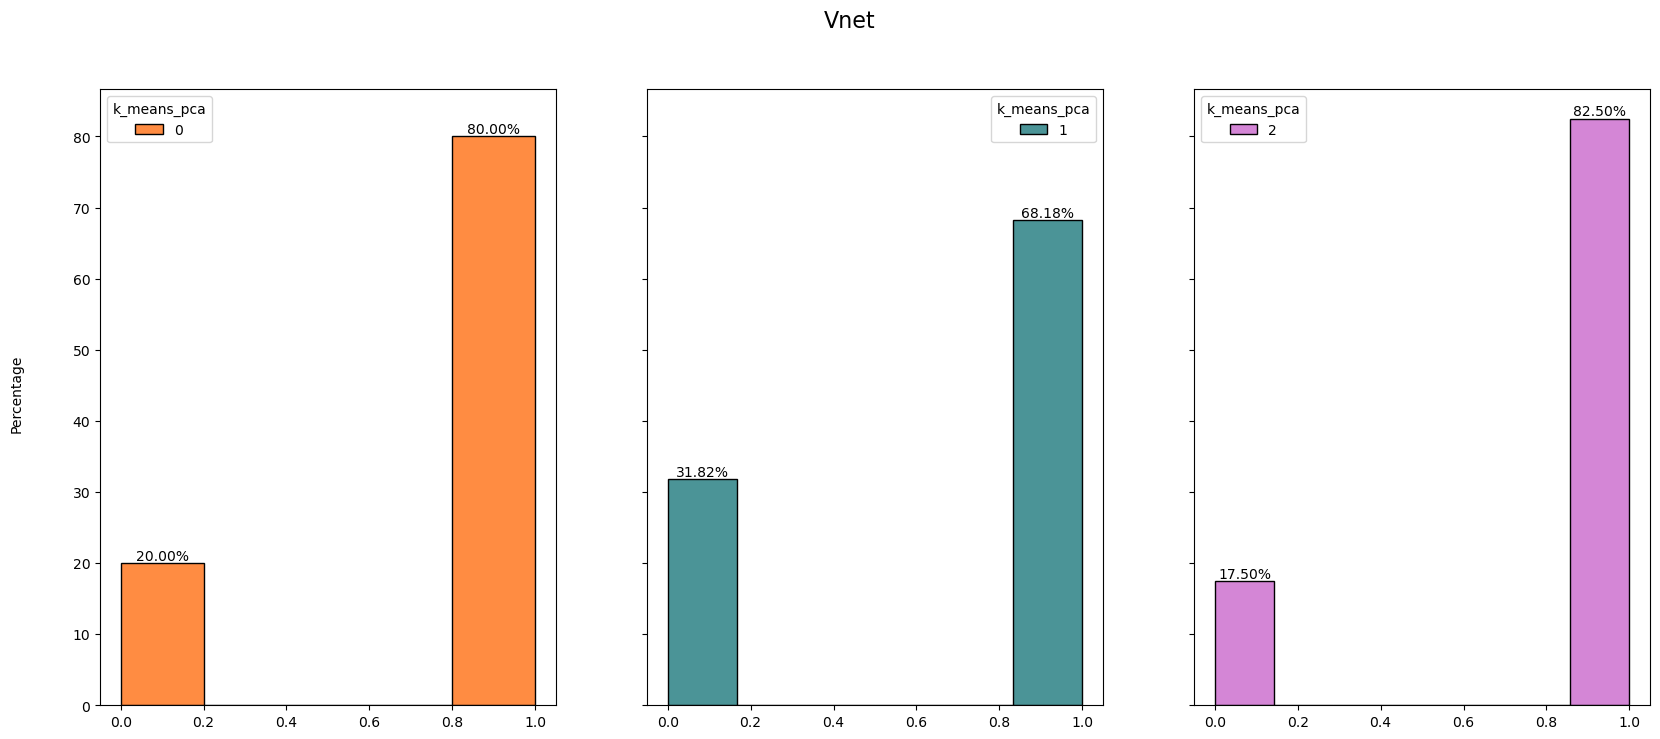

In [52]:
question = ['Vnet']
fig, axes = plt.subplots(len(question), 3, figsize=(20, 8), sharey='row',sharex='all')
fig.text(0.08,0.5,s='Percentage',va='center', rotation='vertical')


plot_question(question,segments,question[0])

/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer 

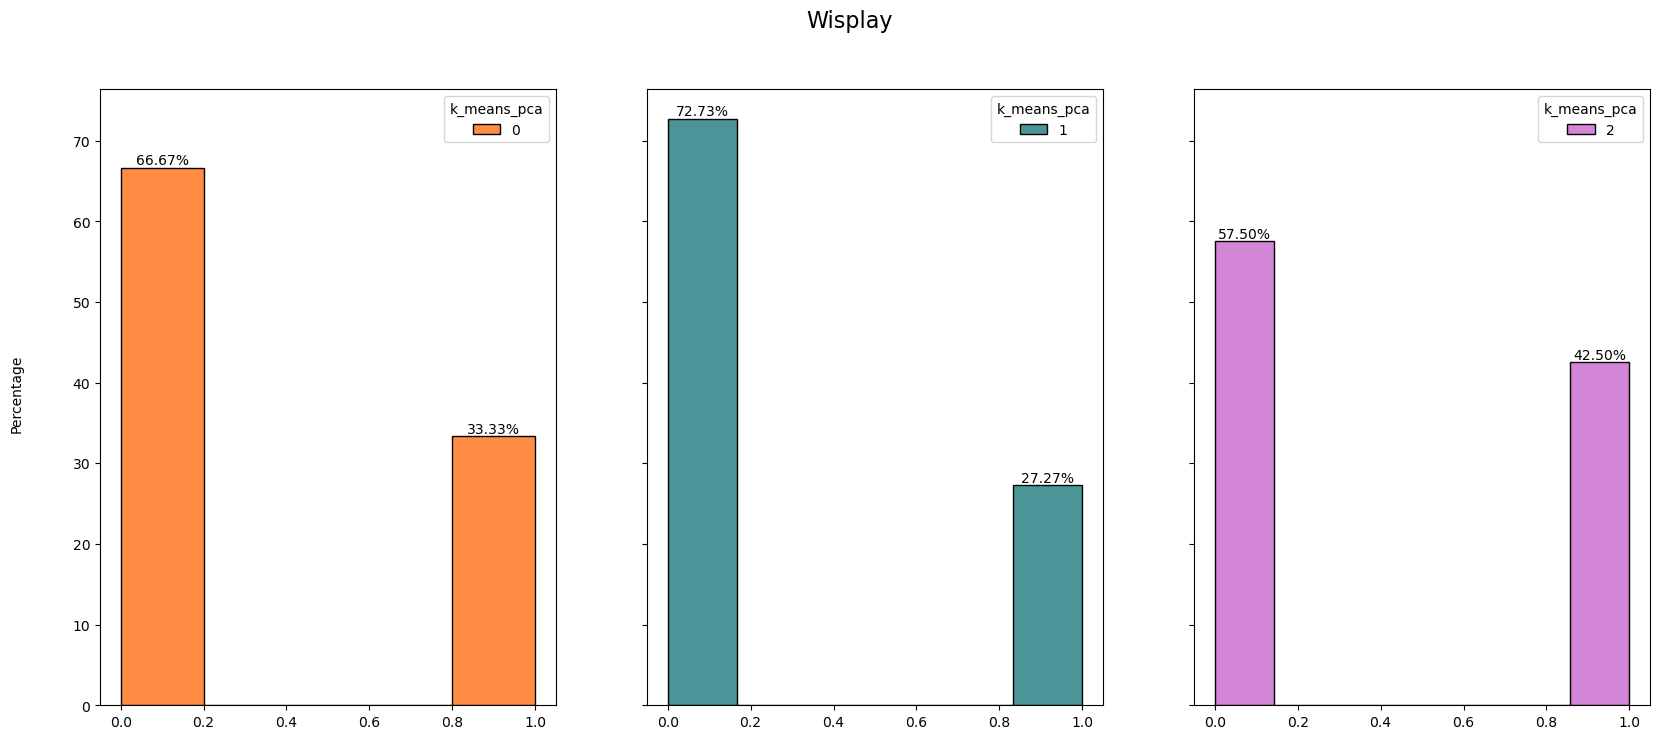

In [53]:
question = ['Wisplay']
fig, axes = plt.subplots(len(question), 3, figsize=(20, 8), sharey='row',sharex='all')
fig.text(0.08,0.5,s='Percentage',va='center', rotation='vertical')


plot_question(question,segments,question[0])

/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer 

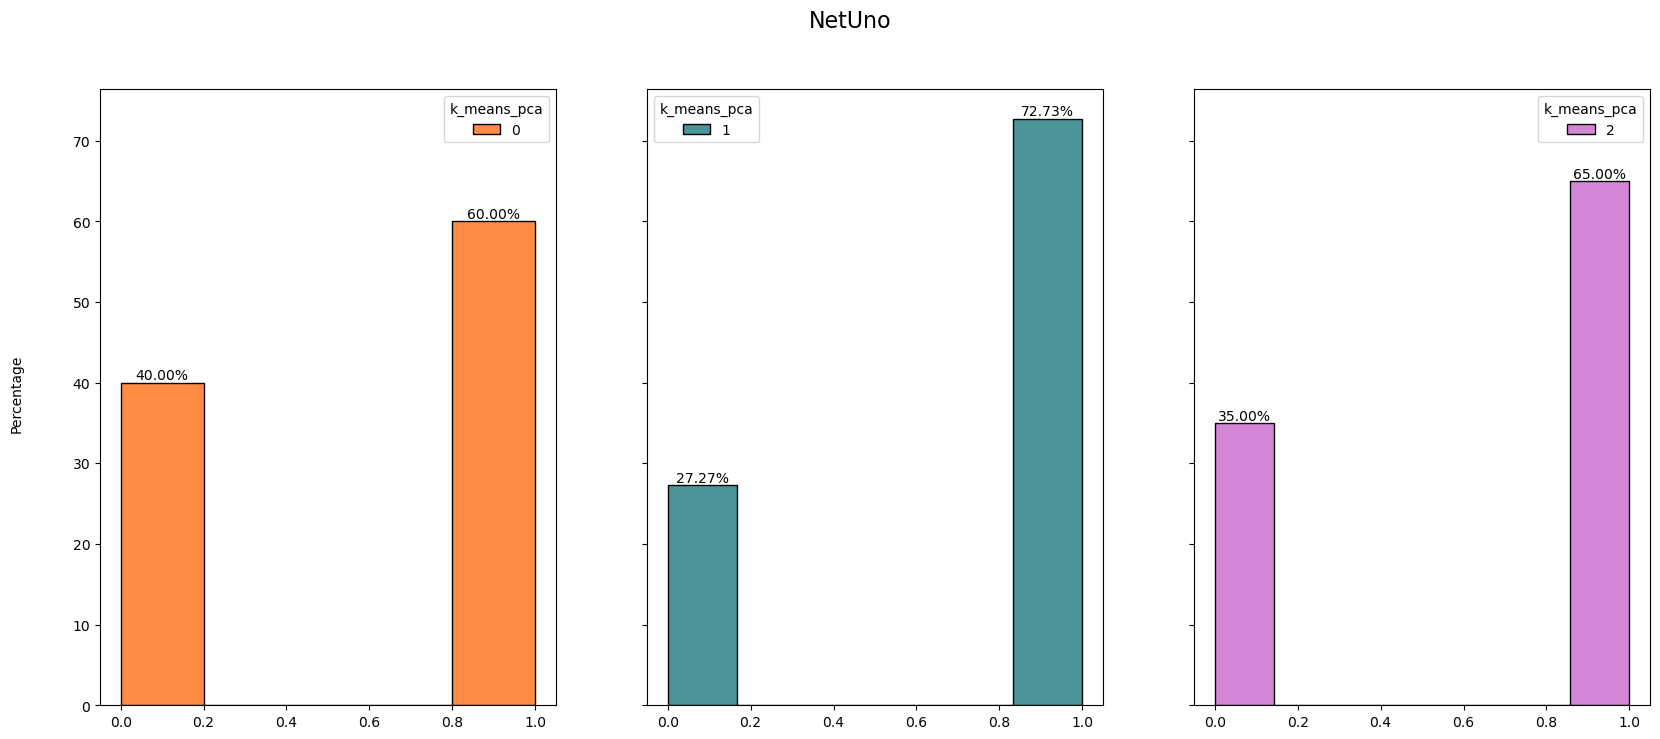

In [54]:
question = ['NetUno']
fig, axes = plt.subplots(len(question), 3, figsize=(20, 8), sharey='row',sharex='all')
fig.text(0.08,0.5,s='Percentage',va='center', rotation='vertical')


plot_question(question,segments,question[0])

/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer 

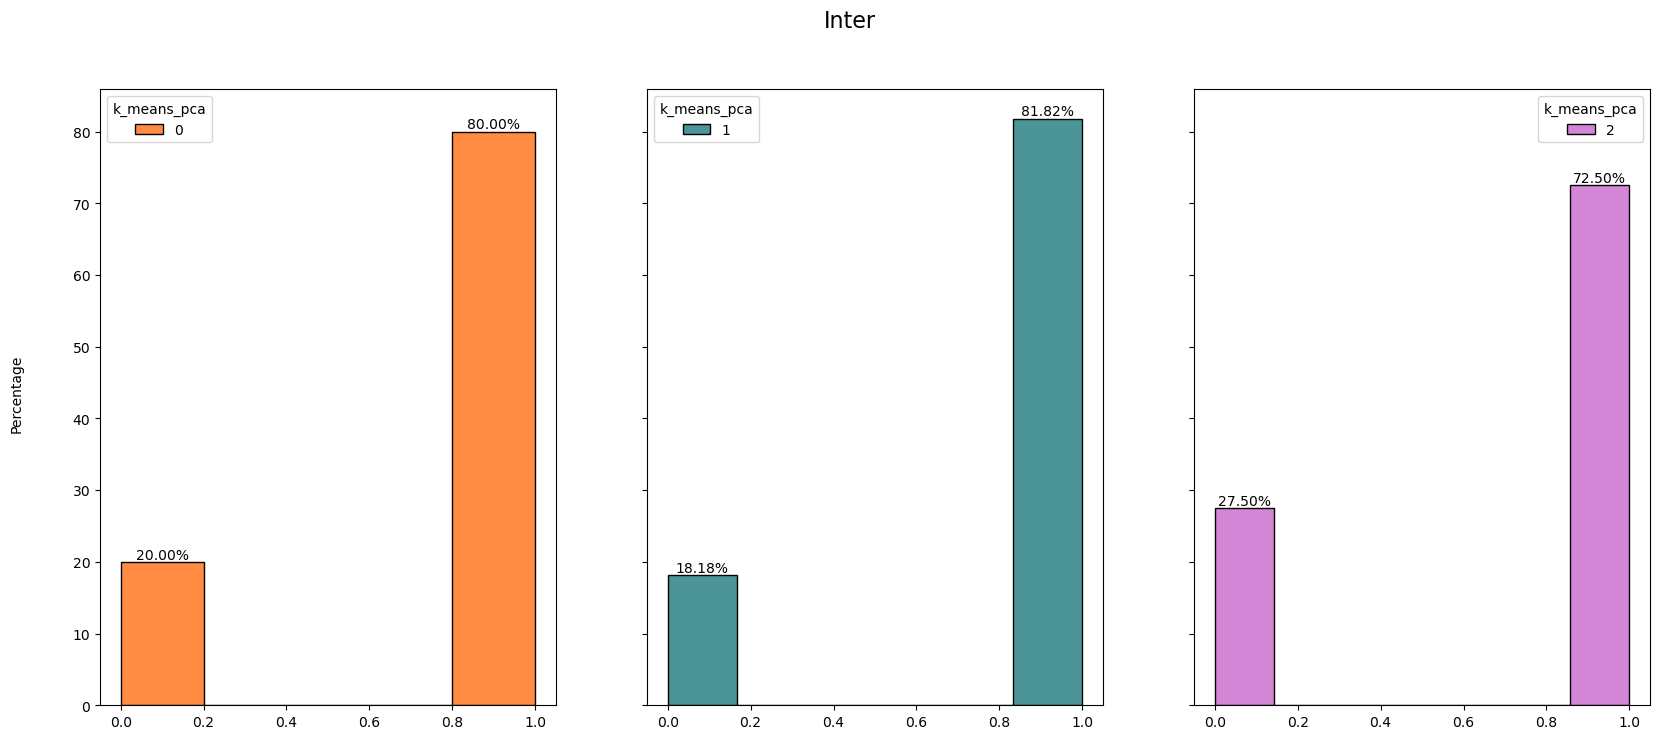

In [55]:
question = ['Inter']
fig, axes = plt.subplots(len(question), 3, figsize=(20, 8), sharey='row',sharex='all')
fig.text(0.08,0.5,s='Percentage',va='center', rotation='vertical')


plot_question(question,segments,question[0])

/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer 

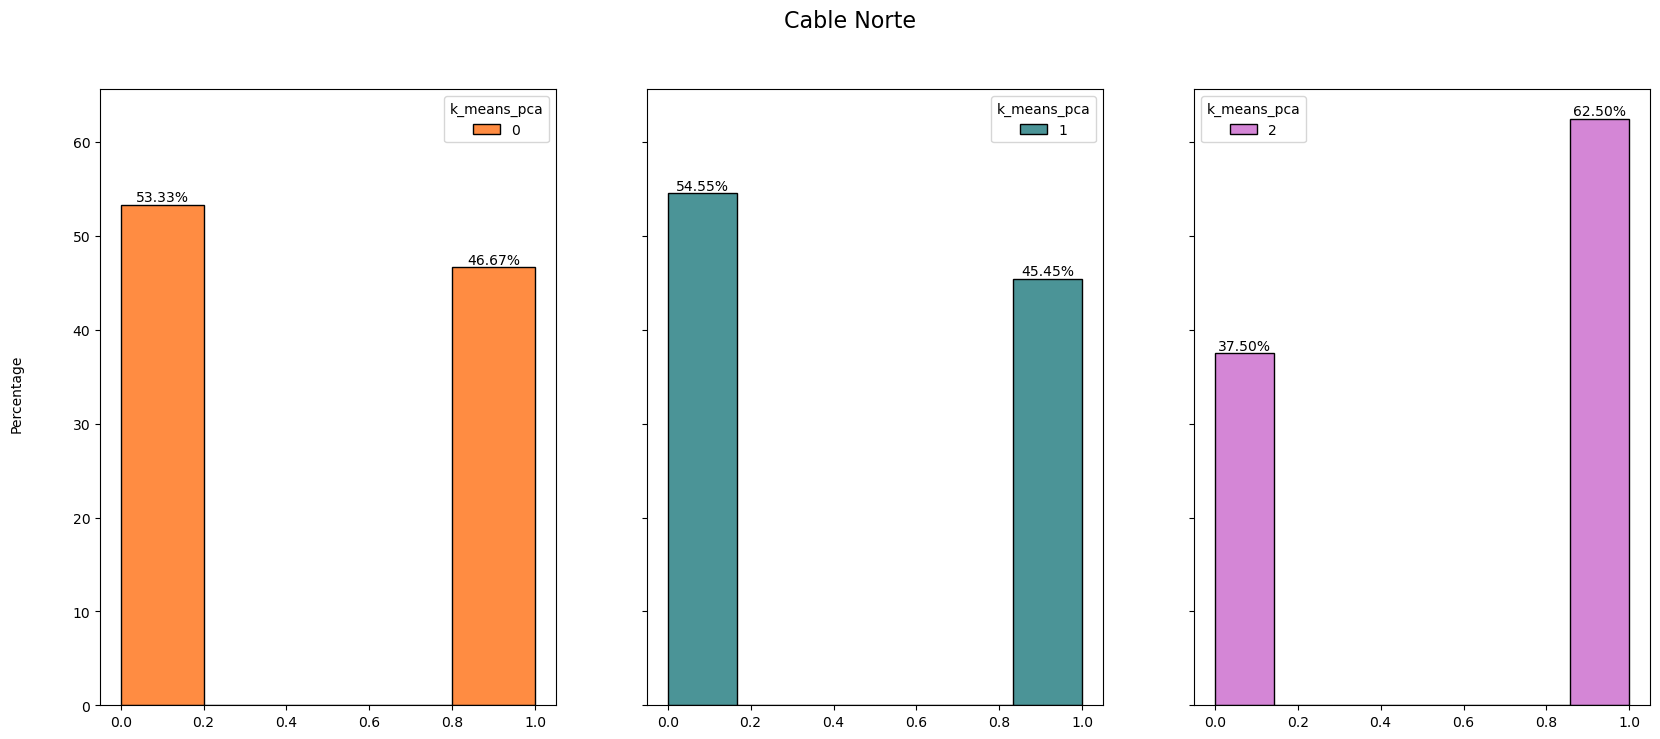

In [56]:
question = ['Cable Norte']
fig, axes = plt.subplots(len(question), 3, figsize=(20, 8), sharey='row',sharex='all')
fig.text(0.08,0.5,s='Percentage',va='center', rotation='vertical')


plot_question(question,segments,question[0])

/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer 

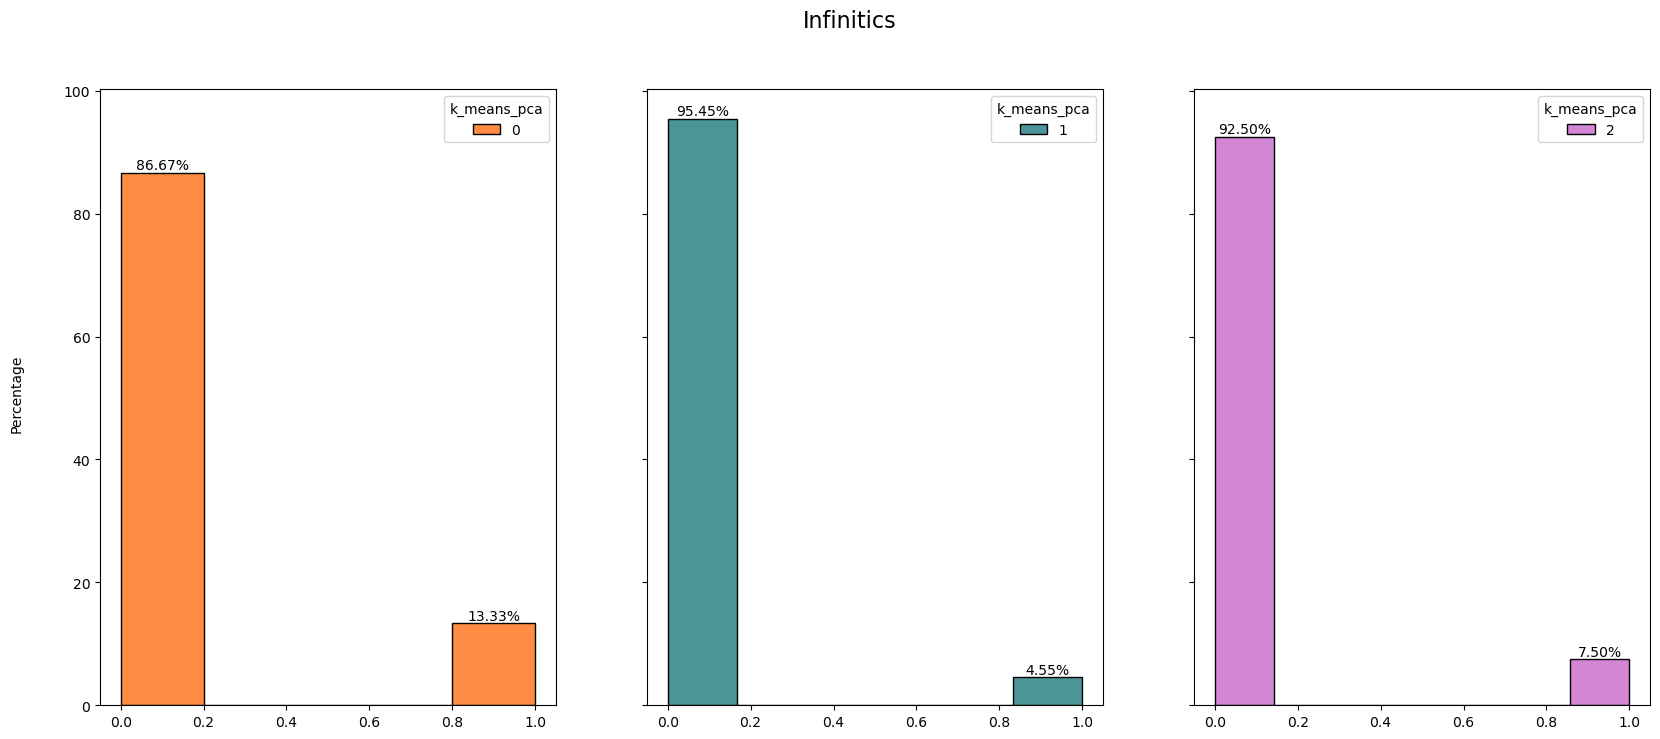

In [57]:
question = ['Infinitics']
fig, axes = plt.subplots(len(question), 3, figsize=(20, 8), sharey='row',sharex='all')
fig.text(0.08,0.5,s='Percentage',va='center', rotation='vertical')


plot_question(question,segments,question[0])

/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer 

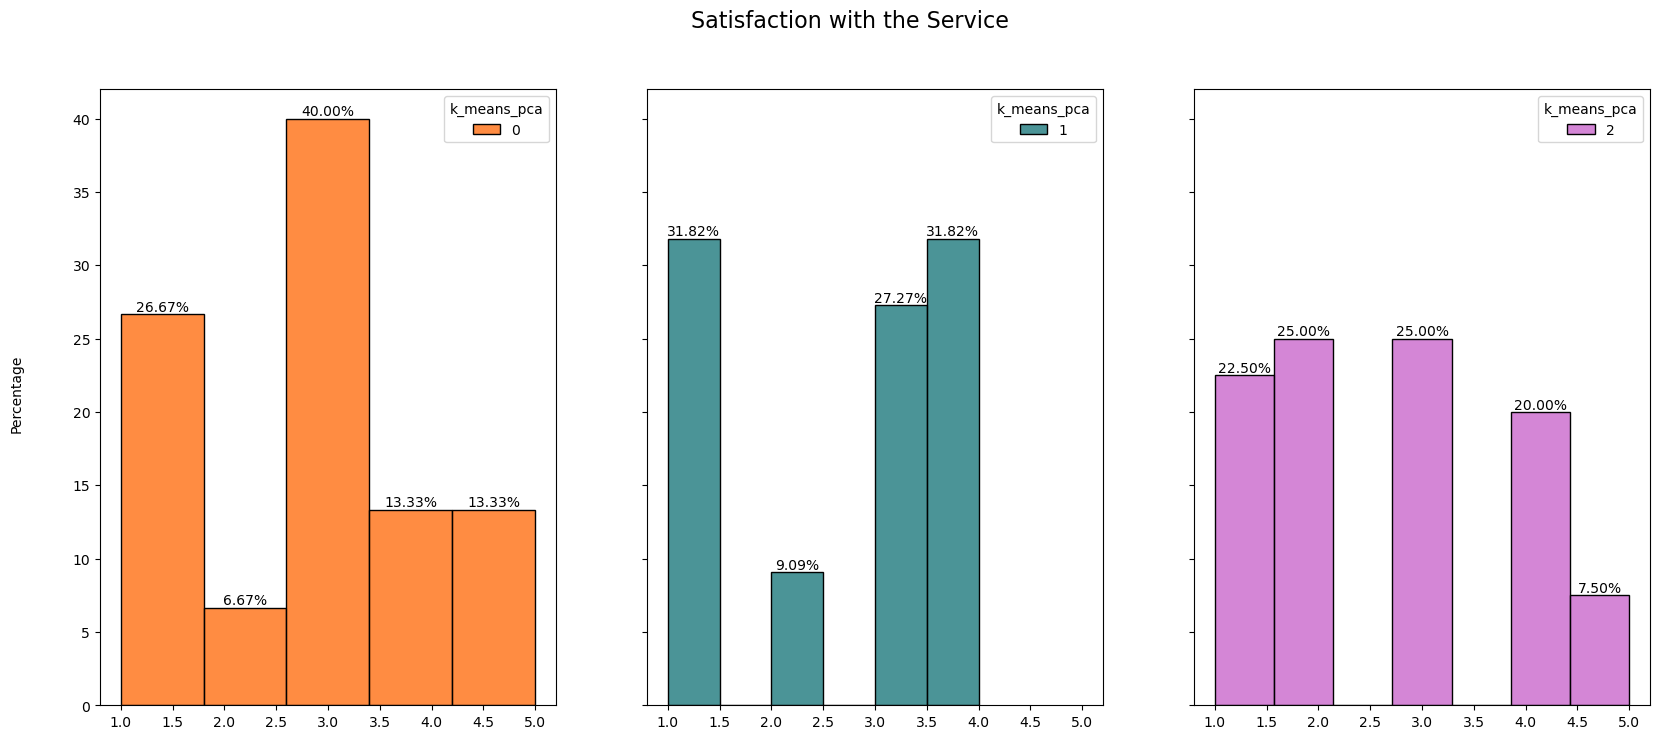

In [58]:
question = ['Satisfaction with the Service']
fig, axes = plt.subplots(len(question), 3, figsize=(20, 8), sharey='row',sharex='all')
fig.text(0.08,0.5,s='Percentage',va='center', rotation='vertical')


plot_question(question,segments,question[0])

/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer 

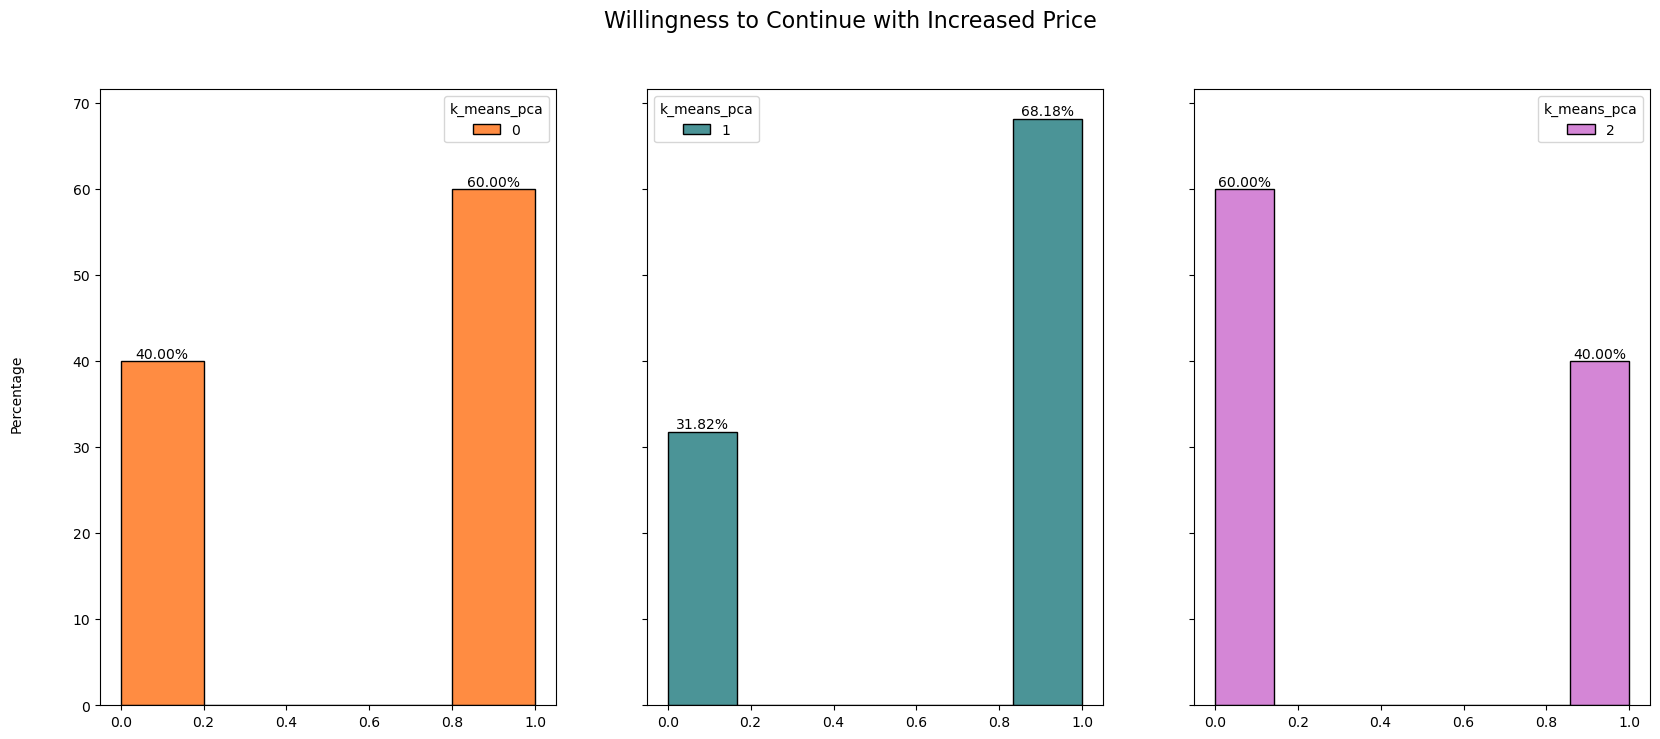

In [59]:
question = ['Willingness to Continue with Increased Price']
fig, axes = plt.subplots(len(question), 3, figsize=(20, 8), sharey='row',sharex='all')
fig.text(0.08,0.5,s='Percentage',va='center', rotation='vertical')


plot_question(question,segments,question[0])

# Communication Channel Analysis

/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer 

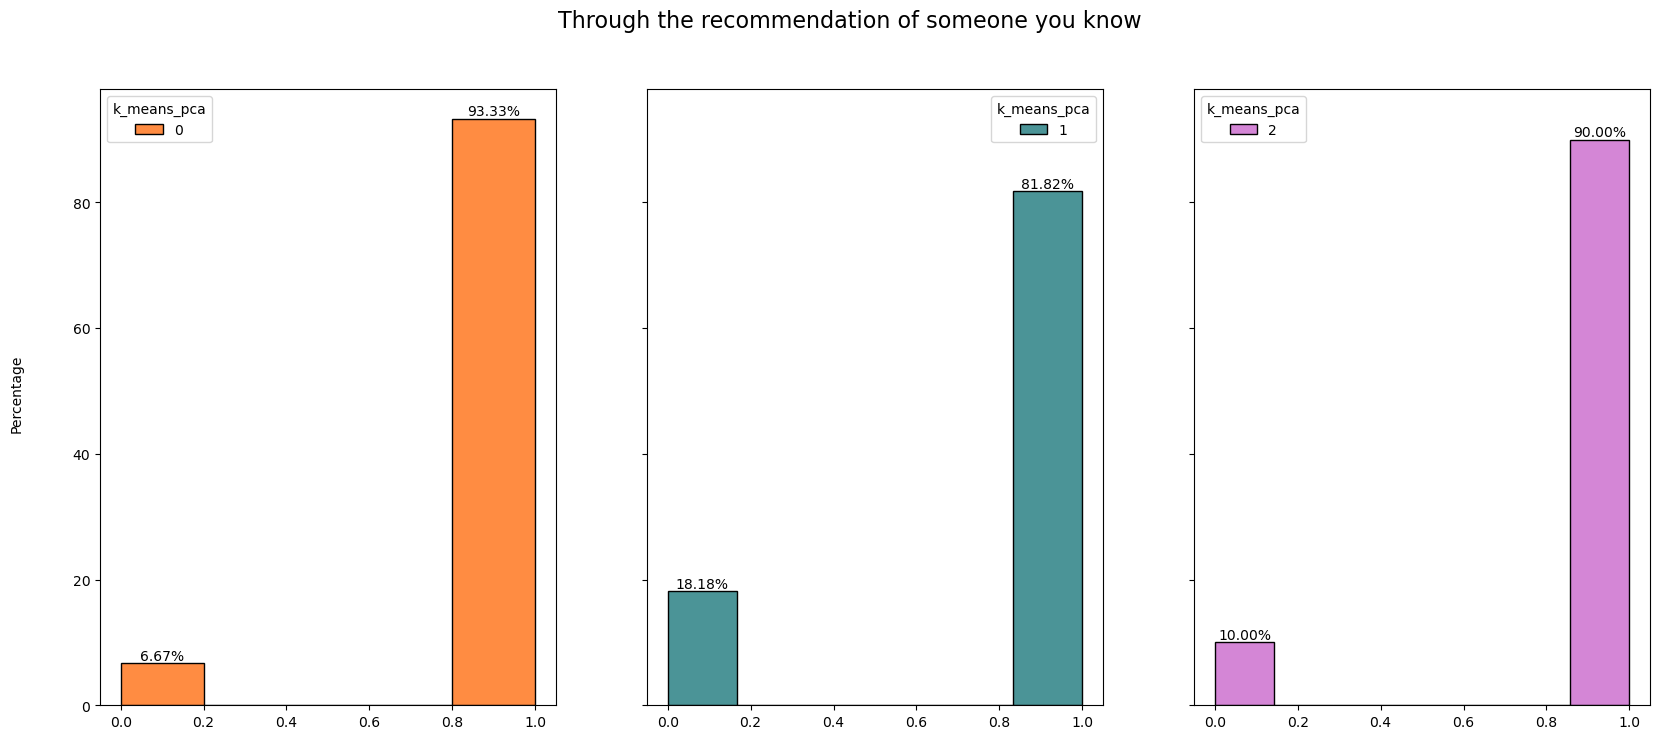

In [60]:
question = ['Through the recommendation of someone you know']
fig, axes = plt.subplots(len(question), 3, figsize=(20, 8), sharey='row',sharex='all')
fig.text(0.08,0.5,s='Percentage',va='center', rotation='vertical')


plot_question(question,segments,question[0])

/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer 

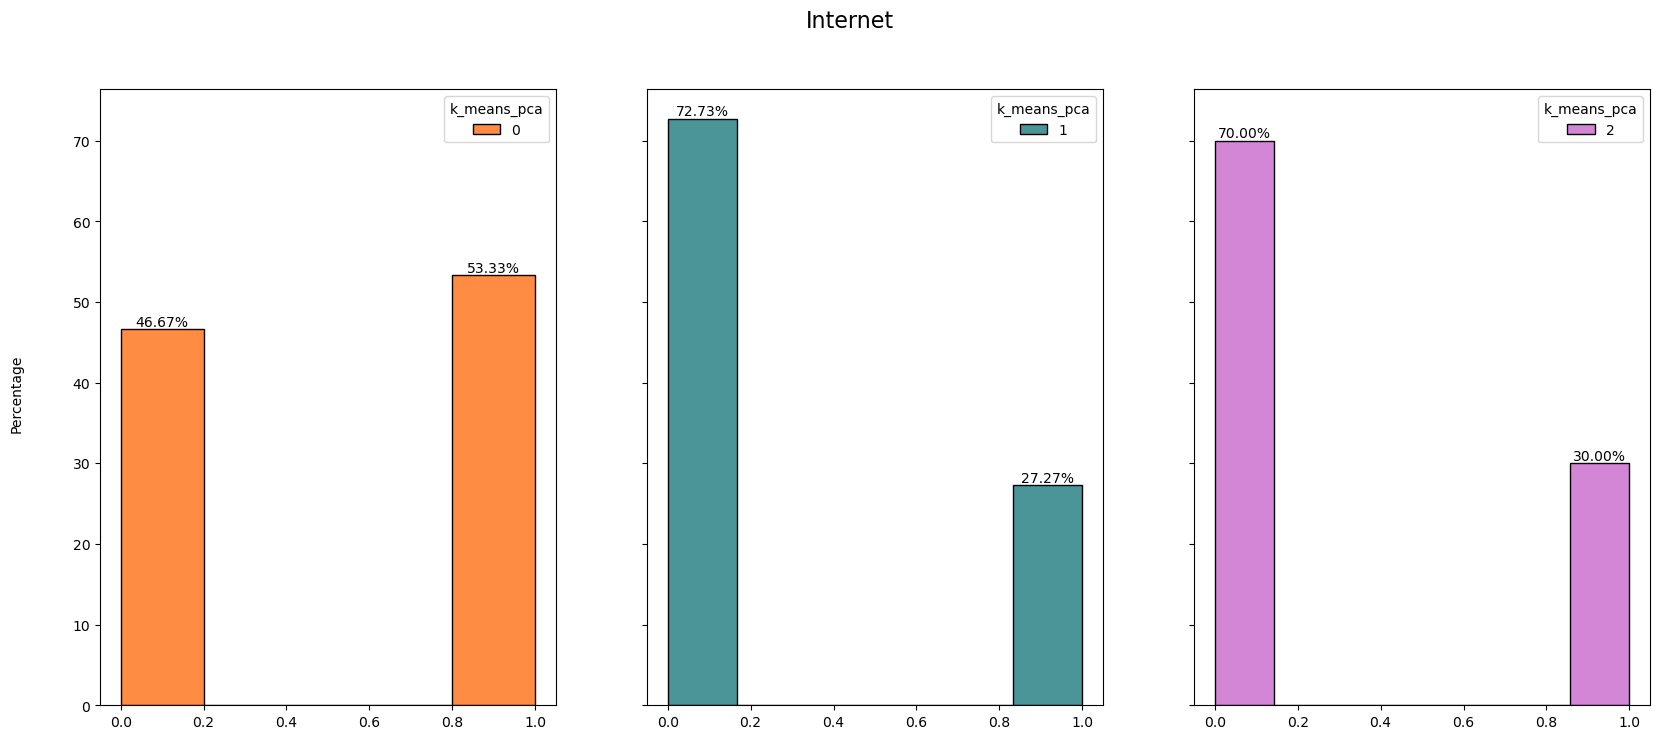

In [61]:
question = ['Internet']
fig, axes = plt.subplots(len(question), 3, figsize=(20, 8), sharey='row',sharex='all')
fig.text(0.08,0.5,s='Percentage',va='center', rotation='vertical')


plot_question(question,segments,question[0])

/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer 

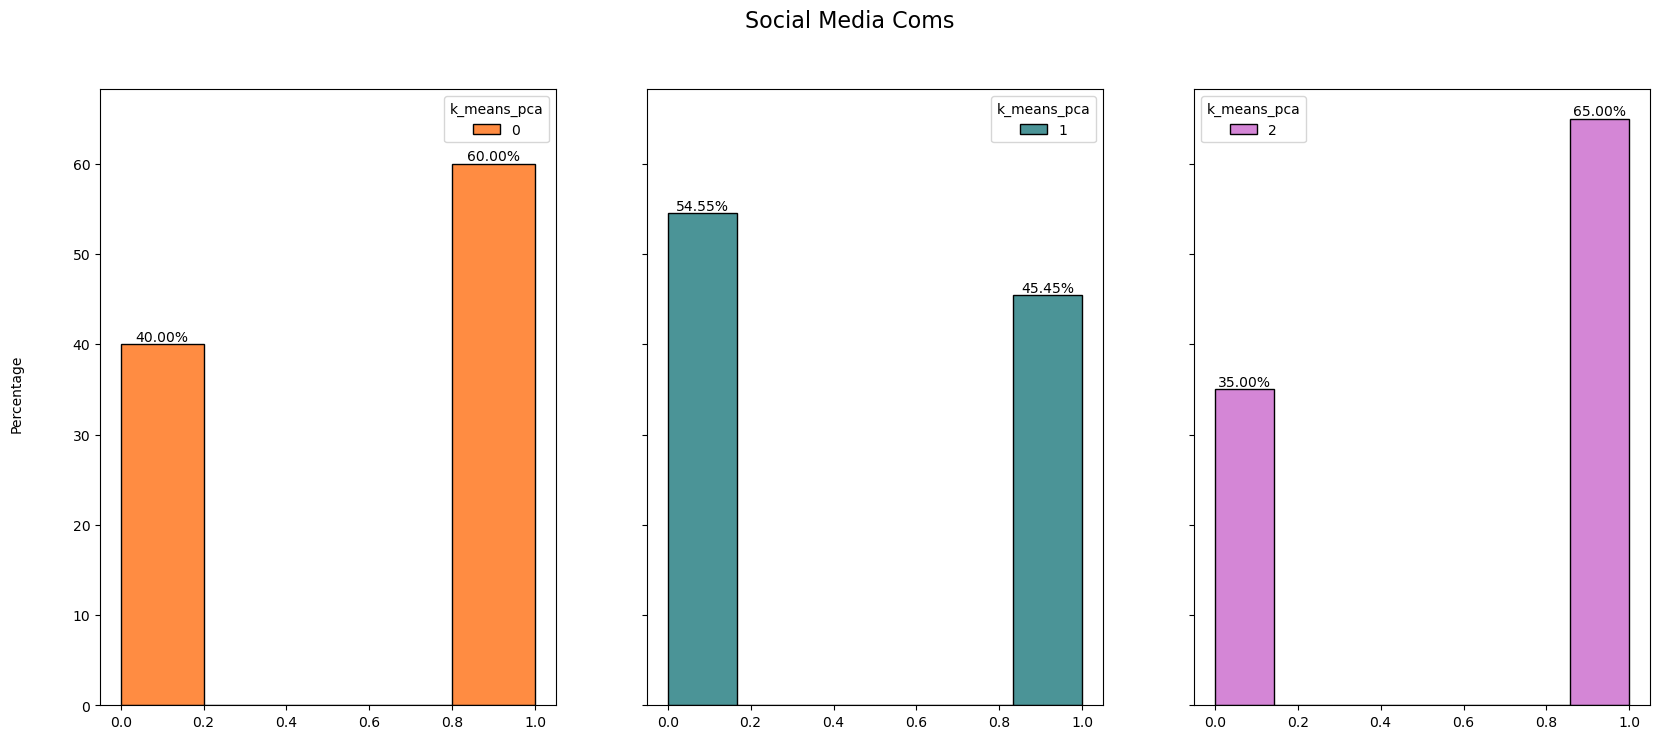

In [62]:
question = ['Social Media Coms']
fig, axes = plt.subplots(len(question), 3, figsize=(20, 8), sharey='row',sharex='all')
fig.text(0.08,0.5,s='Percentage',va='center', rotation='vertical')


plot_question(question,segments,question[0])

/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer 

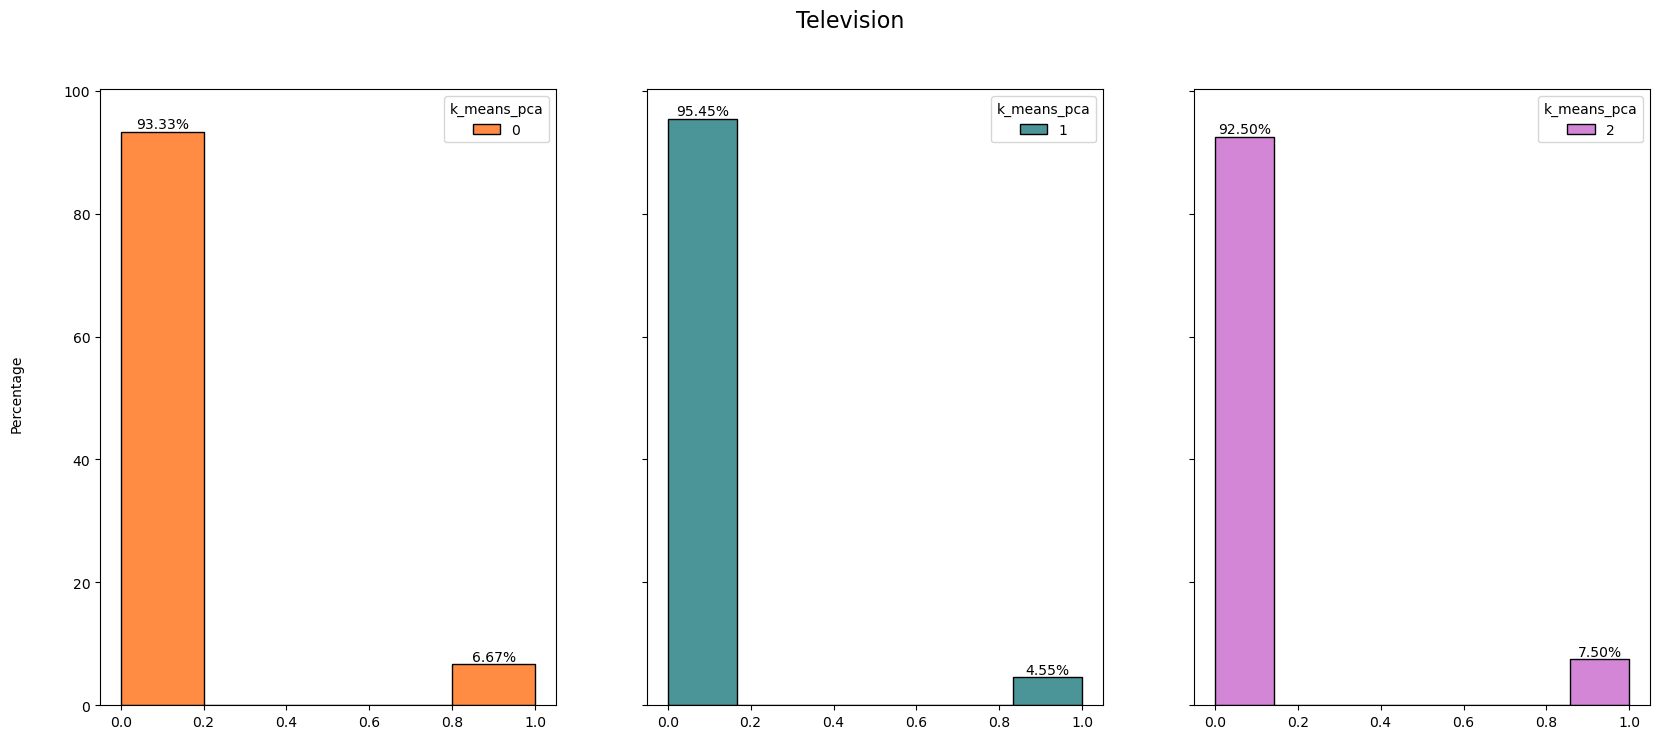

In [63]:
question = ['Television']
fig, axes = plt.subplots(len(question), 3, figsize=(20, 8), sharey='row',sharex='all')
fig.text(0.08,0.5,s='Percentage',va='center', rotation='vertical')


plot_question(question,segments,question[0])

/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer 

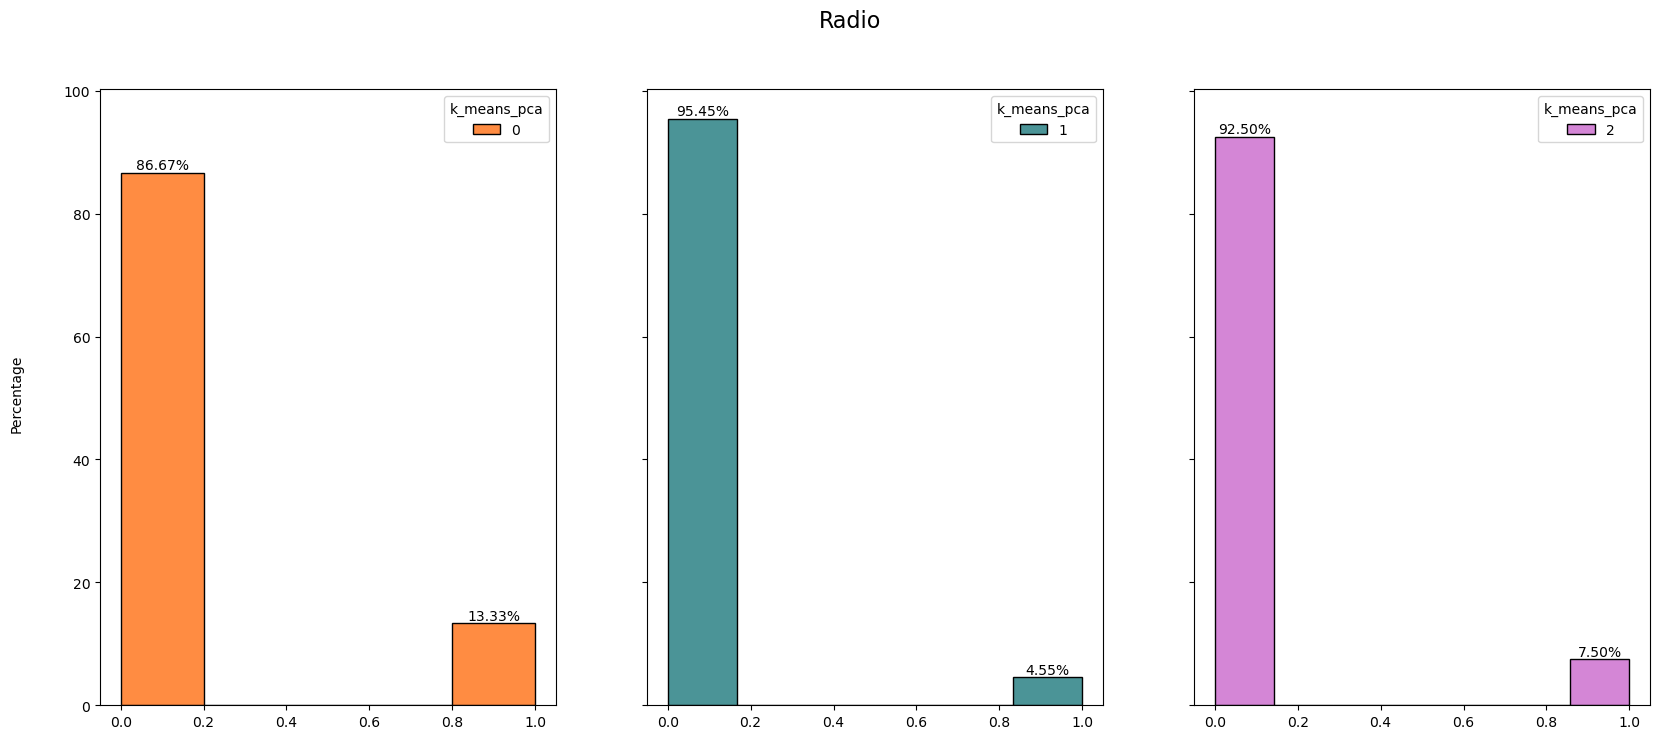

In [64]:
question = ['Radio']
fig, axes = plt.subplots(len(question), 3, figsize=(20, 8), sharey='row',sharex='all')
fig.text(0.08,0.5,s='Percentage',va='center', rotation='vertical')


plot_question(question,segments,question[0])

/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer 

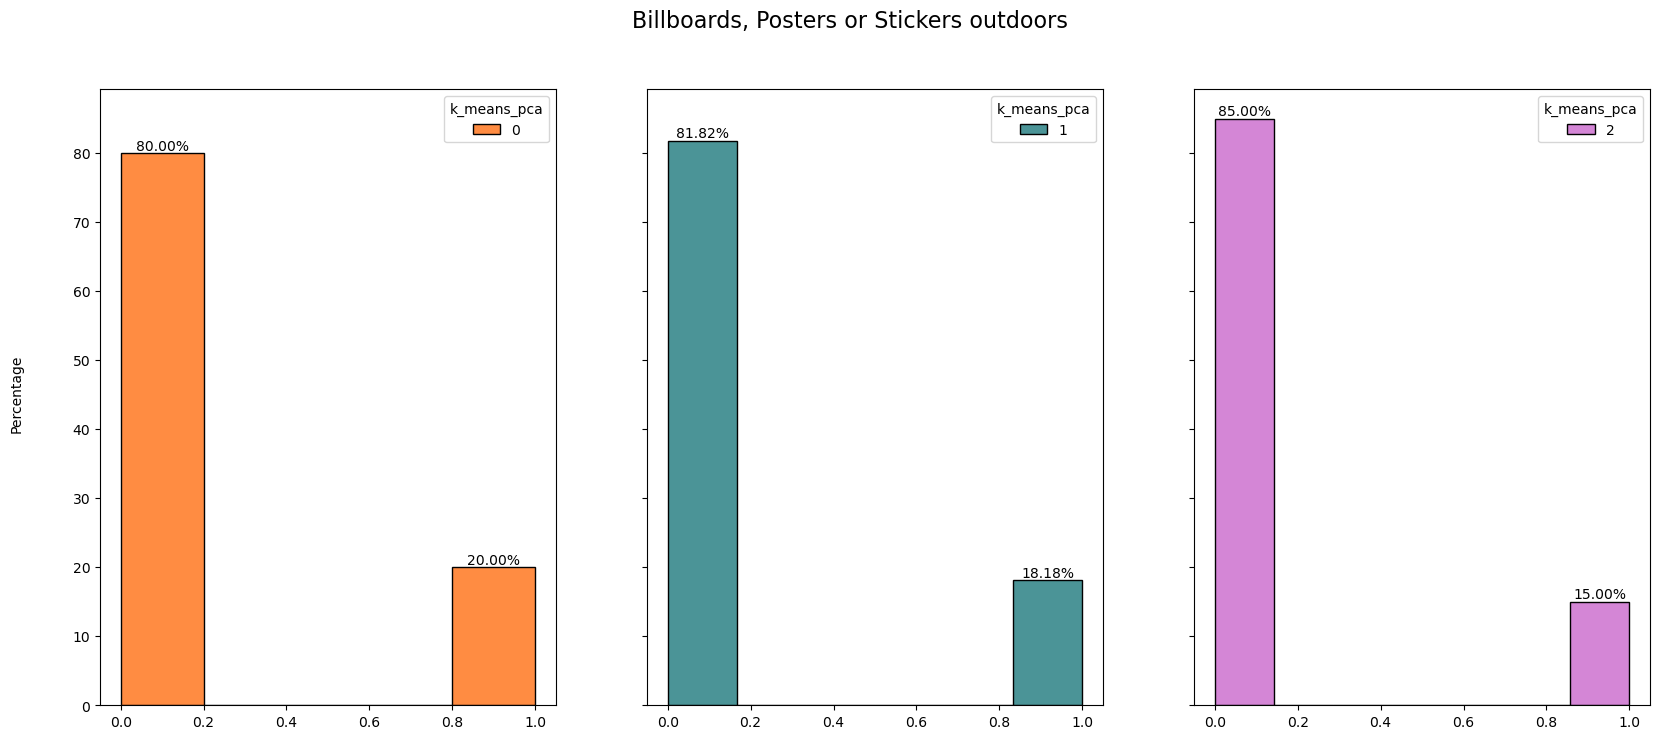

In [65]:
question = ['Billboards, Posters or Stickers outdoors']
fig, axes = plt.subplots(len(question), 3, figsize=(20, 8), sharey='row',sharex='all')
fig.text(0.08,0.5,s='Percentage',va='center', rotation='vertical')


plot_question(question,segments,question[0])

/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lsascol/anaconda3/envs/tesis2/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer 

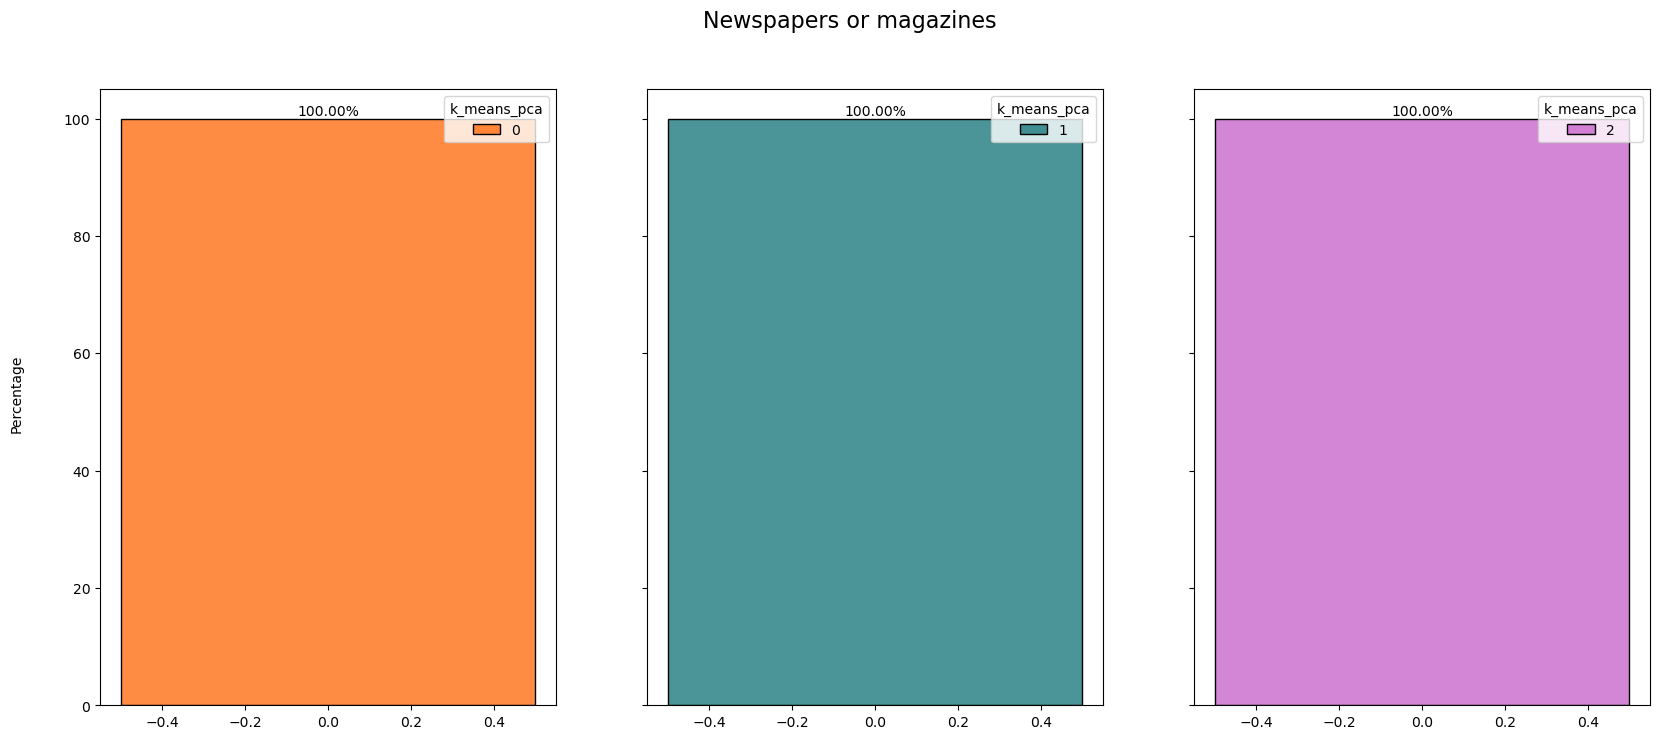

In [66]:
question = ['Newspapers or magazines']
fig, axes = plt.subplots(len(question), 3, figsize=(20, 8), sharey='row',sharex='all')
fig.text(0.08,0.5,s='Percentage',va='center', rotation='vertical')


plot_question(question,segments,question[0])